# Data Profiling and Cleaning

We profiled and cleaned the NYC opendata `DOB Job Application Filings` data using pandas and openclean

Run all the cells in order to profile and clean the data

Robert Ronan, Sheng Tong, Jerry Lee

In [2]:
import openclean
import glob
import pandas as pd
import numpy as np
import re

# Data Downloading

Download the data using openClean

In [3]:
import gzip
import humanfriendly
import os

from openclean.data.source.socrata import Socrata

dataset = Socrata().dataset('xubg-57si')
datafile = './xubg-57si.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'DOB NOW: Safety – Facades Compliance Filings' in file ./xubg-57si.tsv.gz of size 3.16 MB


# Data Loading

Load the data into pandas and openClean dataset object

In [160]:
import pandas as pd
from openclean.pipeline import stream

df  = pd.read_csv(datafile, dtype='object', sep='\t')
ds = stream(datafile, delim='\t')

In [161]:
np.__version__

'1.21.3'

In [162]:
pd.__version__

'1.3.4'

In [163]:
import glob

In [164]:
glob.glob("*")

['DOB_Job_Application_Filings.csv',
 'DOB_Job_Cleaning.ipynb',
 'DOB_Job_Cleaning_2-Copy1.ipynb',
 'DOB_Job_Cleaning_2.ipynb',
 'ic3t-wcy2.tsv.gz',
 'ipu4-2q9a.tsv.gz',
 'README.md',
 'xubg-57si.tsv.gz']

### Get some basic info about the dataset columns

In [165]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   TR6_NO                           55302 non-null  object
 1   CONTROL_NO                       55302 non-null  object
 2   FILING_TYPE                      55302 non-null  object
 3   CYCLE                            55302 non-null  object
 4   BIN                              55274 non-null  object
 5   HOUSE_NO                         55302 non-null  object
 6   STREET_NAME                      55302 non-null  object
 7   BOROUGH                          55302 non-null  object
 8   BLOCK                            55302 non-null  object
 9   LOT                              55302 non-null  object
 10  SEQUENCE_NO                      53978 non-null  object
 11  SUBMITTED_ON                     47766 non-null  object
 12  CURRENT_STATUS                  

If any rows are complete duplicates, drop them

In [166]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [167]:
df = df.dropna(axis=1, thresh = 100)

In [168]:
df

,TR6_NO,CONTROL_NO,FILING_TYPE,CYCLE,BIN,HOUSE_NO,STREET_NAME,BOROUGH,BLOCK,LOT,...,FILING_DATE,FILING_STATUS,PRIOR_CYCLE_FILING_DATE,PRIOR_STATUS,FIELD_INSPECTION_COMPLETED_DATE,QEWI_SIGNED_DATE,LATE_FILING_AMT,FAILURE_TO_FILE_AMT,FAILURE_TO_COLLECT_AMT,COMMENTS
0,TR6-816907-8A-N1,816907,Auto-Generated,8,1061189,66,ST NICHOLAS PLACE,MANHATTAN,2054,82,...,NaN,No Report Filed,NaN,NaN,NaN,NaN,31000,12000,0,NaN
1,TR6-816908-8A-N1,816908,Auto-Generated,8,3165427,2160,84TH STREET,BROOKLYN,6335,29,...,NaN,No Report Filed,NaN,NaN,NaN,NaN,31000,12000,0,NaN
2,TR6-816911-8B-N1,816911,Auto-Generated,8,2116869,770,EAST 166 STREET,BRONX,2640,50,...,NaN,No Report Filed,NaN,NaN,NaN,NaN,5500,1000,0,NaN
3,TR6-816859-8C-N1,816859,Auto-Generated,8,2016101,3871,SEDGWICK AVENUE,BRONX,3263,292,...,NaN,No Report Filed,NaN,NaN,NaN,NaN,25000,10000,0,NaN
4,TR6-816860-8B-N1,816860,Auto-Generated,8,2017526,2784,MORRIS AVENUE,BRONX,3318,81,...,NaN,No Report Filed,NaN,NaN,NaN,NaN,28000,11000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,TR6-800794-8A-I2,800794,Initial,8,1005887,109,ST MARKS PLACE,MANHATTAN,436,42,...,03/27/2017 12:00:00 AM,SWARMP,07/19/2012 12:00:00 AM,SWARMP,09/27/2017 12:00:00 AM,11/23/2017 07:00:00 PM,3250,0,0,NaN
55298,TR6-800777-8A-I1,800777,Initial,8,1005719,195,CHRYSTIE STREET,MANHATTAN,426,29,...,NaN,No Report Filed,03/21/2013 12:00:00 AM,SAFE,09/27/2017 12:00:00 AM,NaN,21750,7000,0,LFF and FTF Civil Penalties Stopped on: 2/11/2...
55299,TR6-800841-8A-I1,800841,Initial,8,1006807,200,EAST 11 STREET,MANHATTAN,466,7502,...,02/21/2017 12:00:00 AM,SAFE,07/19/2013 12:00:00 AM,SAFE,02/08/2017 12:00:00 AM,02/21/2017 12:00:00 AM,4250,1000,0,NaN
55300,TR6-800720-8A-I1,800720,Initial,8,1004491,745,EAST 6 STREET,MANHATTAN,376,41,...,02/21/2017 12:00:00 AM,SWARMP,03/12/2013 12:00:00 AM,SAFE,08/30/2017 12:00:00 AM,09/23/2017 12:00:00 AM,18000,0,0,NaN


In [169]:
# Need 382 examples for sample

In [170]:
df_sample = df.sample(382).copy()

In [171]:
df_sample

,TR6_NO,CONTROL_NO,FILING_TYPE,CYCLE,BIN,HOUSE_NO,STREET_NAME,BOROUGH,BLOCK,LOT,...,FILING_DATE,FILING_STATUS,PRIOR_CYCLE_FILING_DATE,PRIOR_STATUS,FIELD_INSPECTION_COMPLETED_DATE,QEWI_SIGNED_DATE,LATE_FILING_AMT,FAILURE_TO_FILE_AMT,FAILURE_TO_COLLECT_AMT,COMMENTS
20870,TR6-602449-NA-I1,602449,Initial,6,1017001,14,EAST 32 STREET,MANHATTAN,861,66,...,02/20/2007 12:00:00 AM,SAFE,02/29/2000 12:00:00 AM,SWARMP,02/08/2007 12:00:00 AM,02/20/2007 12:00:00 AM,7750,1000,0,NaN
4256,TR6-701985-7A-A1,701985,Amended,7,1015429,12,WEST 18 STREET,MANHATTAN,819,7501,...,08/29/2013 12:00:00 AM,SAFE,NaN,NaN,NaN,NaN,250,0,0,CYCLE 7 INITIAL FILING WAS REJECTED 6/8/12 AND...
14730,TR6-600920-NA-I1,600920,Initial,6,1007556,75,SPRING STREET,MANHATTAN,496,40,...,06/05/2007 12:00:00 AM,SWARMP,02/29/2000 12:00:00 AM,SAFE,04/01/2007 12:00:00 AM,05/02/2007 12:00:00 AM,33100,12000,0,CYCLE 6 REPORT FILED - LATE PENALTY PAID - INV...
5413,TR6-706797-7A-S1,706797,Subsequent,7,1059655,509,WEST 121 STREET,MANHATTAN,1976,20,...,11/27/2013 12:00:00 AM,SAFE,03/06/2008 12:00:00 AM,SAFE,07/13/2011 12:00:00 AM,07/14/2011 12:00:00 AM,1950,0,0,E-MAIL SPECTOR@SUPERSTRUCTURES.COMSUBSEQUENT R...
29267,TR6-608260-NA-A1,608260,Amended,6,2092669,633,OLMSTEAD AVENUE,BRONX,3567,1,...,04/28/2011 12:00:00 AM,SAFE,NaN,SWARMP,NaN,NaN,1000,0,0,NEW OWNER: BARBARA JONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41329,TR6-811086-8C-A1,811086,Amended,8,4432207,60-10,47 AVENUE,QUEENS,2322,1,...,02/03/2017 12:00:00 AM,SWARMP,05/04/2016 12:00:00 AM,UNSAFE,02/03/2017 12:00:00 AM,03/16/2017 12:00:00 AM,0,0,5000,NaN
54226,TR6-808988-8C-A1,808988,Amended,8,3325907,202,YORK STREET,BROOKLYN,71,1,...,06/15/2018 12:00:00 AM,SWARMP,12/23/2015 12:00:00 AM,UNSAFE,05/22/2018 12:00:00 AM,06/11/2018 08:00:00 PM,0,0,0,NaN
8340,TR6-709433-7B-A1,709433,Amended,7,3050417,550,GREENE AVENUE,BROOKLYN,1798,40,...,03/07/2014 12:00:00 AM,SAFE,NaN,UNSAFE,NaN,NaN,0,0,0,NaN
55300,TR6-800720-8A-I1,800720,Initial,8,1004491,745,EAST 6 STREET,MANHATTAN,376,41,...,02/21/2017 12:00:00 AM,SWARMP,03/12/2013 12:00:00 AM,SAFE,08/30/2017 12:00:00 AM,09/23/2017 12:00:00 AM,18000,0,0,NaN


## Describe columns in groups so they fit on screen

In [172]:
df[df.columns[:20]].describe()

,TR6_NO,CONTROL_NO,FILING_TYPE,CYCLE,BIN,HOUSE_NO,STREET_NAME,BOROUGH,BLOCK,LOT,SEQUENCE_NO,SUBMITTED_ON,CURRENT_STATUS,QEWI_NAME,QEWI_BUS_NAME,QEWI_BUS_STREET_NAME,QEWI_CITY,QEWI_STATE,QEWI_ZIP,QEWI_NYS_LIC_NO
count,55294,55294,55294,55294,55266,55294,55294,55294,55294,55294,53970,47764,54986,46350,45596,47727,47232,47724,15926,15949
unique,55280,43624,4,4,15202,4077,2467,5,3621,460,63,4311,4,2102,4668,3862,533,16,219,457
top,TR6-815013-8B-I1,613144,Initial,8,1084781,1,BROADWAY,MANHATTAN,3944,1,1,2007-02-21 00:00:00,SAFE,PAUL MILLMAN,"EPSTEIN ENGINEERING, P.C",480 NORTH BROADWAY,NEW YORK,NY,10001,RA - 014327
freq,2,8,40187,21418,37,315,1573,32376,189,10772,42779,1215,27965,1318,904,1775,27480,43829,2883,621


In [173]:
# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Establishment looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN


In [174]:
df[df.columns[20:40]].describe()

,OWNER_NAME,OWNER_BUS_NAME,FILING_DATE,FILING_STATUS,PRIOR_CYCLE_FILING_DATE,PRIOR_STATUS,FIELD_INSPECTION_COMPLETED_DATE,QEWI_SIGNED_DATE,LATE_FILING_AMT,FAILURE_TO_FILE_AMT,FAILURE_TO_COLLECT_AMT,COMMENTS
count,15962,48313,47339,55294,39878,42536,43457,42542,53875,53876,54091,16352
unique,5410,24705,4317,4,4923,4,4986,5028,614,25,390,8885
top,LLOYD VALDEZ,N.Y.C.H.A.,02/21/2007 12:00:00 AM,SAFE,02/21/2007 12:00:00 AM,SAFE,11/01/2006 01:00:00 AM,02/15/2007 12:00:00 AM,0,0,0,N.Y.C.H.A
freq,723,2262,1215,20340,1288,17618,125,395,22244,35438,44895,373


In [175]:
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

#  Lots of the same First and Last name

# Check names and titles

# APPLICATNT LICENCSE # NEEDS TO BE A STRING TO PERSERVE THE 0 ON IT (PROBABLY)

# Professional Cert looks binary and has 5 values + maybe NAN



In [176]:
#df[df.columns[40:60]].describe()

In [177]:
# Need to convert date columns to pd.datetime
# RENAME PAID TO PAID DATE
# RENAME FULLY PAID TO FULLY PAID DATE
# RENAME ASSISGNED TO ASSIGNED DATE
# RENAME APPROVED TO APPROVED DATE

# CHECK COHERENCE OF PAID DATE <= FULLY PAID DATE
# CHECK COHERENCE OF PRE FILING DATE <= PAID DATE
# CHECK COHERENCE OF ASSIGNED DATE <= APPROVED DATE
# 

# REMOVE $ FROM Initial Cost and Total Estimated Fee, and put them in column name, convert values to floats

# Check What fee status is

# Check Existing Zoning Sqft, Propsed Zoning Sqft, Enlargement SQ Footage for reasonable values
# Change either Sqft to SQ Footage or vvice-versa

# Horizontal Enlargement and Vertical Enlargement are booleans + NAN
# Change Enlrgmt to Enlargement

#Chcek ExisitngNo. of Stories and Proposed # of Stories for reasonableness
# Add space between Existing and No.
# Change either Job# to Job No. or vice versa
# maybe just change all the No./# to "number"

# Check Existing and proposed height for reasonableness. Add unit to column name

# check Existing Dwelling Units for reasonableness 



In [178]:
#df[df.columns[60:80]].describe()

In [179]:
# check Proposed Dwelling Units
## Why does Existing Occupancy have fewer cats than Proposed Occupancy. Check those.

# What is Site Fill. 

# Get list of NYC ZOning Districts and Special Districts

# Checmk Owner Typer for spelling issues

# Non Profit is binary

# Check Owners's First and last name

# Owner'sBuisness Name should not be "OWNER"

# Owner's house number, streeet name, city, state and zip have almost no values

# Why is the same phone number so common

In [180]:
#df[df.columns[80:100]].describe()

In [181]:

# That is a lot of unique job descriptions

# Add spaces to DOB Run Date name
# make DOB Run Date a datetime

# What is Job_S1_NO. It uses underscores.

# All the remaining columns have ALL CAPS NAMES WITH UNDERSCORES 
# TOTAL_CONSTRUCTION_FLOOR_AREA, WITHDRAWAL_FLAG

# SIGNOFF_DATE needs to be datetime
# SPECIAL_ACTION_STATUS
# SPECIAL_ACTION_DATE needs to be datetime
# BUILDING_CLASS
# What is JOB_NO_GOOD_COUNT
#
# maybe need GIS DATA
# GIS_LATITUDE
# GIS_LONGITUDE
# GIS_COUNCIL_DISTRICT
# GIS_CENSUS_TRACT
# GIS_NTA_NAME
# GIS_BIN
# 

In [182]:
df.columns

Index(['TR6_NO', 'CONTROL_NO', 'FILING_TYPE', 'CYCLE', 'BIN', 'HOUSE_NO',
       'STREET_NAME', 'BOROUGH', 'BLOCK', 'LOT', 'SEQUENCE_NO', 'SUBMITTED_ON',
       'CURRENT_STATUS', 'QEWI_NAME', 'QEWI_BUS_NAME', 'QEWI_BUS_STREET_NAME',
       'QEWI_CITY', 'QEWI_STATE', 'QEWI_ZIP', 'QEWI_NYS_LIC_NO', 'OWNER_NAME',
       'OWNER_BUS_NAME', 'FILING_DATE', 'FILING_STATUS',
       'PRIOR_CYCLE_FILING_DATE', 'PRIOR_STATUS',
       'FIELD_INSPECTION_COMPLETED_DATE', 'QEWI_SIGNED_DATE',
       'LATE_FILING_AMT', 'FAILURE_TO_FILE_AMT', 'FAILURE_TO_COLLECT_AMT',
       'COMMENTS'],
      dtype='object')

## Renaming columns

In [183]:
rename_list = list(df.columns)
rename_dict = dict()

for i in rename_list:
    col_name = str(i)
    # https://stackoverflow.com/questions/2277352/split-a-string-at-uppercase-letters
    # Split on upper case to seperate cocnatenated words:
    if (not col_name.islower()) and (not col_name.isupper()):
        col_name = " ".join(re.sub("([A-Z])", r" \1", col_name).split())
    # Split on underscores and make Title Case 
    col_name = col_name.strip().replace("_", " ").lower().title().replace("’", "'").replace(".", "")
        
    col_name = col_name.replace("No", "Number")
    col_name = col_name.replace("#", "Number")
    
    rename_dict[i] = col_name

In [184]:
rename_dict

{'TR6_NO': 'Tr6 Number',
 'CONTROL_NO': 'Control Number',
 'FILING_TYPE': 'Filing Type',
 'CYCLE': 'Cycle',
 'BIN': 'Bin',
 'HOUSE_NO': 'House Number',
 'STREET_NAME': 'Street Name',
 'BOROUGH': 'Borough',
 'BLOCK': 'Block',
 'LOT': 'Lot',
 'SEQUENCE_NO': 'Sequence Number',
 'SUBMITTED_ON': 'Submitted On',
 'CURRENT_STATUS': 'Current Status',
 'QEWI_NAME': 'Qewi Name',
 'QEWI_BUS_NAME': 'Qewi Bus Name',
 'QEWI_BUS_STREET_NAME': 'Qewi Bus Street Name',
 'QEWI_CITY': 'Qewi City',
 'QEWI_STATE': 'Qewi State',
 'QEWI_ZIP': 'Qewi Zip',
 'QEWI_NYS_LIC_NO': 'Qewi Nys Lic Number',
 'OWNER_NAME': 'Owner Name',
 'OWNER_BUS_NAME': 'Owner Bus Name',
 'FILING_DATE': 'Filing Date',
 'FILING_STATUS': 'Filing Status',
 'PRIOR_CYCLE_FILING_DATE': 'Prior Cycle Filing Date',
 'PRIOR_STATUS': 'Prior Status',
 'FIELD_INSPECTION_COMPLETED_DATE': 'Field Inspection Completed Date',
 'QEWI_SIGNED_DATE': 'Qewi Signed Date',
 'LATE_FILING_AMT': 'Late Filing Amt',
 'FAILURE_TO_FILE_AMT': 'Failure To File Amt',
 '

In [185]:
df = df.rename(columns=rename_dict)

#Lower cased but not sure if this is necessary

# df = df.rename(columns={
#                          "PERMIT_SI_NO": "Permit Si #"
#                         , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"
#                         , "WITHDRAWAL_FLAG": "Withdrawl Flag"
#                         , "SIGNOFF_DATE": "Signoff Date"
#                         , "SPECIAL_ACTION_STATUS": "Special Action Status"
#                         , "SPECIAL_ACTION_DATE": "Special Action Date"
#                         , "BUILDING_CLASS": "Building Class"
#                         , "JOB_NO_GOOD_COUNT": "Job No Good Count"
#                         , "LATITUDE": "GIS Latitude"
#                         , "LONGITUDE": "GIS Longitude"
#                         , "COUNCIL_DISTRICT": "GIS Council District"
#                         , "CENSUS_TRACT": "GIS Census Tract"
#                         , "NTA_NAME": "GIS NTA Name"
#                         , "GIS_BIN": "GIS Bin"
#                         })


#### Method to get an idea of the top 10 values of a column

In [186]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    try:
        print(df[column_name].value_counts(dropna=False)[:show_rows])
    except KeyError as e:
        print("Could not print column: ", column_name)
    print()

### Examining Job #s

Some repition in the Job #'s, but nothing major. We will check some of the repeated Job #s to be sure they actually refer to the same jobs

In [187]:
df['Tr6 Number'].value_counts(dropna=False)

TR6-815013-8B-I1    2
TR6-613144-NA-S1    2
TR6-814993-8A-N1    2
TR6-601435-NA-I1    2
TR6-613144-NA-N1    2
                   ..
TR6-601544-NA-I1    1
TR6-601544-NA-A1    1
TR6-601545-NA-I1    1
TR6-601546-NA-I1    1
TR6-800945-8A-I1    1
Name: Tr6 Number, Length: 55280, dtype: int64

Nothing weird looking here

## Examining and reparing house #s

House #'s appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [188]:
show_vals('House Number', show_rows=10)

Top 10 House Number:

1      315
50     300
30     293
60     287
40     282
200    281
100    269
20     261
10     243
150    238
Name: House Number, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [189]:
df['House Number'].fillna('', inplace=True)
df['House Number'] = df['House Number'].astype('str')
df['House Number'] = df['House Number'].str.upper()

Check for numbers spelled out as words

In [190]:
df.loc[(~df['House Number'].isna())
       &(df['House Number'].str.isalpha())]['House Number']

Series([], Name: House Number, dtype: object)

Maybe the house Number and borough were flipped in the 'manhattan' case?

Check if thses are empty strings:

In [191]:
df.loc[(~df['House Number'].str.contains('\\d', regex=True))]['House Number']

Series([], Name: House Number, dtype: object)

Replace spelling of numbers with their value, and remove values 'PIER',  'MANHATTAN',  'NO NUMBER'

In [192]:
df.loc[df['House Number'].str.strip('')=='ONE', 'House Number'] = '1'
df.loc[df['House Number'].str.strip('')=='PIER', 'House Number'] = ''
df.loc[df['House Number'].str.strip('')=='MANHATTAN', 'House Number'] = ''
df.loc[df['House Number'].str.strip('')=='NO NUMBER', 'House Number'] = ''

# Number need to add B
df.loc[df['House Number'].str.strip('')=='B', 'House Number'] = ''


Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [193]:
df.loc[(~df['House Number'].isna())
       &(~df['House Number'].str.isdigit())]['House Number']

5         88-29
10        82-08
11        82-45
13       137-21
14       135-05
          ...  
55228      5-19
55240    107-19
55250     42-04
55283     56-10
55286     91-35
Name: House Number, Length: 6418, dtype: object

Check non-numeric house Number's that don't have dashes

In [194]:
df.loc[(~df['House Number'].isna())
       &(~df['House Number'].str.isdigit())
      &(~df['House Number'].str.contains('-', regex=False))]['House Number'][:25]

38156     132 A
39627    1157 A
46215    1157 A
48359     132 A
Name: House Number, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [195]:
df['House Number'] = df['House Number'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street Number

In [196]:
df['House Number'] = df['House Number'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [197]:
df['House Number'] = df['House Number'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['House Number'] = df['House Number'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['House Number'] = df['House Number'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['House Number'] = df['House Number'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [198]:
## Confirm that it worked correctly:
df.loc[(~df['House Number'].isna())
       &(~df['House Number'].str.isdigit())
       &(~df['House Number'].str.contains('-', regex=False))]['House Number'][:30]

38156     132 A
39627    1157 A
46215    1157 A
48359     132 A
Name: House Number, dtype: object

##### Looking at Binary/Pseudo-binary columns:

For these columns it's clear NaN idicates 'no', however some columns, like site-fill don't quite work

In [199]:
for col in df.columns:
    if df[col].nunique() < 7:
        show_vals(col)

Top 10 Filing Type:

Initial           40187
Auto-Generated     7501
Amended            6376
Subsequent         1230
Name: Filing Type, dtype: int64

Top 10 Cycle:

8    21418
6    15962
7    15658
9     2256
Name: Cycle, dtype: int64

Top 10 Borough:

MANHATTAN        32376
BROOKLYN          8043
BRONX             7555
QUEENS            6741
STATEN ISLAND      579
Name: Borough, dtype: int64

Top 10 Current Status:

SAFE               27965
SWARMP             20114
UNSAFE              3811
No Report Filed     3096
NaN                  308
Name: Current Status, dtype: int64

Top 10 Filing Status:

SAFE               20340
SWARMP             17592
UNSAFE              9425
No Report Filed     7937
Name: Filing Status, dtype: int64

Top 10 Prior Status:

SAFE               17618
SWARMP             17507
NaN                12758
UNSAFE              4555
No Report Filed     2856
Name: Prior Status, dtype: int64



In [200]:
df['Prior Status'].fillna('No Report Filed', inplace=True)
df['Current Status'].fillna('No Report Filed', inplace=True)


In [201]:
# show_vals('Non-Profit')
# show_vals('Self Cert')
# show_vals('Filing Status')
# show_vals('Site Fill')
# show_vals('Act as Superintendent')
# show_vals('Building Type')
# show_vals('Residential')
# show_vals('Oil Gas')

Replace the Nan values with False and replace the other values with True, and then cast the columns to be type bool

In [202]:
df.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

In [203]:
# list of Owner's columns:
owner_cols = df.columns[np.where(np.char.find(np.array(list(df.columns)), 'Owner') > -1)[0]]

In [204]:
np.where(np.char.find(np.array(list(df.columns)), 'Owner') > -1)[0]

array([20, 21], dtype=int64)

In [205]:
owner_cols

Index(['Owner Name', 'Owner Bus Name'], dtype='object')

In [206]:
for c in owner_cols:
    show_vals(c)

Top 10 Owner Name:

NaN                          39332
LLOYD  VALDEZ                  723
GARY  GUILLAUME                539
MARTHA  BRAZOBAN               202
EDWARD  MCARTHUR               151
RICHARD  MORRISON              116
MICHAEL  WOLFE                 106
JUAN R.  TORRES                 97
MARY FRANCES  SHAUGHNESSY       90
PHILLIP  WISCHERTH              82
Name: Owner Name, dtype: int64

Top 10 Owner Bus Name:

NaN                                    6981
N.Y.C.H.A.                             2262
NEW YORK CITY HOUSING AUTHORITY        2118
NYCHA                                  1549
PR                                      837
NYC HOUSING AUTHORITY                   712
COLUMBIA UNIVERSITY                     275
NEW YORK UNIVERSITY                     182
N.Y.C.H.A                               125
PARKCHESTER SOUTH CONDOMINIUM, INC.      97
Name: Owner Bus Name, dtype: int64



In [65]:
df['Owner Bus Street Name'].value_counts()

Series([], Name: Owner Bus Street Name, dtype: int64)

## Fixing owner's informations

In [207]:
df.loc[~df["Owner Bus Name"].isna() & df["Owner Bus Name"].str.contains("(?i)new york city")]["Owner Bus Name"].value_counts()

NEW YORK CITY HOUSING AUTHORITY                                  2118
NEW YORK CITY HOUSING AUTH                                         22
New York City Housing Authority                                     8
NEW YORK CITY HOUSING                                               3
NEW YORK CITY ECONOMIC DEVELOPMENT                                  3
NEW YORK CITY HOSUING AUTHORITY                                     3
NEW YORK CITY SAKS LLC                                              3
NEW YORK CITY HOUSING AUTORITY                                      2
NEW YORK CITY DEPT.OF EDUC                                          1
NEW YORK CITY DCAS                                                  1
NEW YORK CITY HOUSING AUTHORITY`                                    1
NEW YORK CITY DESIGN CENTER                                         1
NEW YORK CITY MANGEMENT                                             1
Westgate New York City, LLC - WESTGATE NEW YORK GRAND CENTRAL       1
NEW YORK CITY HOUSIN

Normalizes a couple of duplicate names

In [208]:
df["Owner Bus Name"] = df["Owner Bus Name"].str.replace("NEW YORK CITY", "NYC")
df["Owner Bus Name"] = df["Owner Bus Name"].str.upper()
df["Owner Bus Name"] = df["Owner Bus Name"].str.replace(".", '', regex=False)
df["Owner Bus Name"] = df["Owner Bus Name"].str.replace(",", '', regex=False)

All these are the same thing. Uses clusters to fix

In [209]:
# may have to use fuzzy/cluster to fix this problem
df.loc[~df["Owner Bus Name"].isna() & df["Owner Bus Name"].str.contains("(?i)HOUSING AUTHORITY")]["Owner Bus Name"].value_counts()

NYC HOUSING AUTHORITY                  2835
NEW YORK HOUSING AUTHORITY                9
NEW YORK CITY HOUSING AUTHORITY           8
NEW YORK CIYY HOUSING AUTHORITY           6
NYC  HOUSING AUTHORITY                    5
N Y C HOUSING AUTHORITY                   2
NYC HOUSING AUTHORITYQ                    1
NEW CITY HOUSING AUTHORITY                1
NYC HOUSING AUTHORITY`                    1
HOUSING AUTHORITY                         1
THE NEW YORK CITY HOUSING AUTHORITY       1
Name: Owner Bus Name, dtype: int64

Used clusters to try to fix the rest of them further below

In [210]:
df.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

A lot of the same phone numbers

In [211]:
#df["Owner's Phone Number"] = df["Owner's Phone Number"].astype('str')

In [73]:
#df.loc[df["Owner's Phone Number"].str.contains("7184728000")][["Owner's First Name", "Owner's Last Name","Owner Bus Name", "Owner's Phone Number"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
1,ELAN,ABNERI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
58,ELAN,ABNERI,NYCSCA,7184728000
611,JOSEPH,SCALISI,NYC SCA,7184728000
621,ELAN,ABNERI,NYC SCA,7184728000
767,ELAN,ABNERI,NYC SCA,7184728000
...,...,...,...,...
3777530,JOSEPH,SCALISI,NYC SCHOOL CONST AUTHORITY,7184728000
3777587,COLIN,ALBERT,NYC SCHOOL CONSTRUCTION AUTHORIT,7184728000
3777588,COLIN,ALBERT,NYC SCHOOL CONSTRUCTION AUTHORIT,7184728000
3777602,ELAN,ABNERI,NYCSCA,7184728000


All from the same business name so it makes sense

In [74]:
#df.loc[df["Owner's Phone Number"]=='nan']

,BOROUGH,Bin #,House #,Street Name,Job #,Job Document #,Job Type,Self Cert,Block,Lot,...,Owner's House State,Owner's House Zip Code,Owner's Phone #,DOB Run Date,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
8820,QUEENS,4014256,22-57,47 STREET,410022871,01,A1,Y,00759,00004,...,NY,11105,nan,07/29/2020 00:00:00,2998503,40.768882,-73.902890,22,137,Steinway
12364,MANHATTAN,1091658,447,LEXINGTON AVENUE,101491271,01,A2,NaN,01299,00053,...,NY,11735,nan,12/25/2020 00:00:00,673977,40.753050,-73.974865,4,92,Turtle Bay-East Midtown
12365,MANHATTAN,1091658,447,LEXINGTON AVENUE,101491271,01,A2,NaN,01299,00053,...,NY,11735,nan,12/25/2020 00:00:00,673980,40.753050,-73.974865,4,92,Turtle Bay-East Midtown
25579,QUEENS,4536576,106-29,156 STREET,402172965,01,A1,NaN,10124,00044,...,NY,11433,nan,07/29/2020 00:00:00,3617521,40.696960,-73.798163,28,254,South Jamaica
28027,BRONX,2124102,1474,OAKLEY STREET,200985960,01,NB,Y,04717,00034,...,NY,10456,nan,07/29/2020 00:00:00,3623446,40.880173,-73.849612,12,386,Eastchester-Edenwald-Baychester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768594,BROOKLYN,3153537,442,86 STREET,301354807,01,A2,NaN,06045,00023,...,NaN,NaN,nan,10/09/2021 00:00:00,1259432,40.622239,-74.027449,43,160,Bay Ridge
3768919,QUEENS,4289557,137-05,253 STREET,402622444,01,A2,Y,13627,00012,...,NaN,NaN,nan,10/13/2021 00:00:00,1679137,40.662410,-73.728295,31,656,Rosedale
3769851,BROOKLYN,3129734,1870,51 STREET,301795074,01,A1,NaN,05468,00034,...,NaN,NaN,nan,11/05/2021 00:00:00,3876879,40.626078,-73.980338,44,472,Borough Park
3773124,BROOKLYN,3129734,1870,51 STREET,301795074,01,A1,NaN,05468,00034,...,NaN,NaN,nan,11/05/2021 00:00:00,3879877,40.626078,-73.980338,44,472,Borough Park


Nothing wrong with these jobs without an owner's phone number

In [75]:
#df.loc[~df["Owner's Phone Number"].isna() & df["Owner's Phone Number"].str.contains("-")]["Owner's Phone Number"].value_counts()

71822936-3    77
212386749-     8
718446591-     7
718343645-     7
71835636-7     7
              ..
212478-989     1
718270499-     1
212269689-     1
212753085-     1
2126-37131     1
Name: Owner's Phone #, Length: 83, dtype: int64

Phone numbers should not contain "-"

In [76]:
#df.loc[~df["Owner's Phone Number"].isna() & df["Owner's Phone Number"].str.contains(" ")]["Owner's Phone Number"].value_counts()

212 929318    46
718  42334    30
212 226650    17
718  88876    10
718   3891    10
              ..
212490 197     1
718  57593     1
212594  14     1
7182 86600     1
212  47727     1
Name: Owner's Phone #, Length: 209, dtype: int64

Phone numbers should not contain empty space

### Cleaning phone number

#### removes non-numeric characters

In [77]:
#df["Owner's Phone Number"] = df["Owner's Phone Number"].str.extract('(\d+)', expand=False)
#df.loc[~df["Owner's Phone Number"].isna() & df["Owner's Phone Number"].str.contains(" ")]["Owner's Phone Number"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

#### Turns phone numbers that start with 0, 1, and does not have 10 digits into nan

In [78]:
#df["Owner's Phone Number"] = df["Owner's Phone Number"].astype('str')
#df.loc[~df["Owner's Phone Number"].isna() & ((df["Owner's Phone Number"].str[0] == "0") | (df["Owner's Phone Number"].str[0] == "1") | (df["Owner's Phone Number"].apply(len) != 10)), ["Owner's Phone Number"]] = np.nan

#### Checks to see if there are any others not of length 10

In [79]:
#df["Owner's Phone Number"] = df["Owner's Phone Number"].astype('str')
#df.loc[(df["Owner's Phone Number"].apply(len) != 10)]["Owner's Phone Number"]

266        nan
1270       nan
2343       nan
5535       nan
5548       nan
          ... 
3776801    nan
3776806    nan
3777021    nan
3777023    nan
3777291    nan
Name: Owner's Phone #, Length: 62721, dtype: object

#### Check for non-numeric charaters

In [80]:
#df.loc[(~df["Owner's Phone Number"].str.isnumeric()) & (~(df["Owner's Phone Number"]=='nan'))]["Owner's Phone Number"]

Series([], Name: Owner's Phone #, dtype: object)

# Fixing Qewi columns

In [213]:
# list of Owner's columns:
qewi_cols = df.columns[np.where(np.char.find(np.array(list(df.columns)), 'Qewi') > -1)[0]]

In [214]:
np.where(np.char.find(np.array(list(df.columns)), 'Qewi') > -1)[0]

array([13, 14, 15, 16, 17, 18, 19, 27], dtype=int64)

In [215]:
qewi_cols

Index(['Qewi Name', 'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City',
       'Qewi State', 'Qewi Zip', 'Qewi Nys Lic Number', 'Qewi Signed Date'],
      dtype='object')

In [216]:
for c in qewi_cols:
    show_vals(c)

Top 10 Qewi Name:

NaN                   8944
PAUL  MILLMAN         1318
ALAN S EPSTEIN        1139
HOWARD L ZIMMERMAN     897
TIMOTHY  WEBB          692
HOWARD  ZIMMERMAN      678
ANTHONY  STASIO        635
CHARLES A MERRITT      623
BARIS  ACAR            604
JOSEPH  CANTON         563
Name: Qewi Name, dtype: int64

Top 10 Qewi Bus Name:

NaN                                9698
EPSTEIN ENGINEERING, P.C            904
SUPERSTRUCTURES ENG. & ARCH         698
RAND ENGINEERING & ARCHITECTURE     621
MERRITT ENGINEERING CONSULTANTS     603
LAWLESS & MANGIONE, LLP             561
HLZIMMERMAN ARCHITECTS              556
GANDHI ENGINEERING INC              497
DEVON ARCHITECTS                    416
RAND ENGINEERING & ARCHITECT        411
Name: Qewi Bus Name, dtype: int64

Top 10 Qewi Bus Street Name:

NaN                                 7567
480 NORTH BROADWAY                  1775
159 WEST 25TH STREET                 872
317 MADISON AVENUE, SUITE 915        812
11 W 30 ST                  

In [219]:
df['Qewi Bus Name']

0                                  NaN
1                                  NaN
2                                  NaN
3                                  NaN
4                                  NaN
                     ...              
55297    KOENIGSBERG ENGINEERING, P.C.
55298    KOENIGSBERG ENGINEERING, P.C.
55299    KOENIGSBERG ENGINEERING, P.C.
55300                              NaN
55301                              NaN
Name: Qewi Bus Name, Length: 55294, dtype: object

In [220]:
df.loc[~df["Qewi Bus Name"].isna() & df["Qewi Bus Name"].str.contains("(?i)new york city")]["Qewi Bus Name"].value_counts()

Series([], Name: Qewi Bus Name, dtype: int64)

Normalizes a couple of duplicate names

In [221]:
df["Qewi Bus Name"] = df["Qewi Bus Name"].str.replace("NEW YORK CITY", "NYC")
df["Qewi Bus Name"] = df["Qewi Bus Name"].str.upper()
df["Qewi Bus Name"] = df["Qewi Bus Name"].str.replace(".", '', regex=False)
df["Qewi Bus Name"] = df["Qewi Bus Name"].str.replace(",", '', regex=False)

All these are the same thing. Uses clusters to fix

In [222]:
# may have to use fuzzy/cluster to fix this problem
df.loc[~df["Qewi Bus Name"].isna() & df["Qewi Bus Name"].str.contains("(?i)HOUSING AUTHORITY")]["Qewi Bus Name"].value_counts()

NEW YORK HOUSING AUTHORITY    1
Name: Qewi Bus Name, dtype: int64

Used clusters to try to fix the rest of them further below

In [223]:
df.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

A lot of the same phone numbers

In [211]:
#df["Qewi Phone Number"] = df["Qewi Phone Number"].astype('str')

In [73]:
#df.loc[df["Qewi Phone Number"].str.contains("7184728000")][["Qewi First Name", "Qewi Last Name","Qewi Bus Name", "Qewi Phone Number"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
1,ELAN,ABNERI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
58,ELAN,ABNERI,NYCSCA,7184728000
611,JOSEPH,SCALISI,NYC SCA,7184728000
621,ELAN,ABNERI,NYC SCA,7184728000
767,ELAN,ABNERI,NYC SCA,7184728000
...,...,...,...,...
3777530,JOSEPH,SCALISI,NYC SCHOOL CONST AUTHORITY,7184728000
3777587,COLIN,ALBERT,NYC SCHOOL CONSTRUCTION AUTHORIT,7184728000
3777588,COLIN,ALBERT,NYC SCHOOL CONSTRUCTION AUTHORIT,7184728000
3777602,ELAN,ABNERI,NYCSCA,7184728000


All from the same business name so it makes sense

In [74]:
#df.loc[df["Qewi Phone Number"]=='nan']

,BOROUGH,Bin #,House #,Street Name,Job #,Job Document #,Job Type,Self Cert,Block,Lot,...,Owner's House State,Owner's House Zip Code,Owner's Phone #,DOB Run Date,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
8820,QUEENS,4014256,22-57,47 STREET,410022871,01,A1,Y,00759,00004,...,NY,11105,nan,07/29/2020 00:00:00,2998503,40.768882,-73.902890,22,137,Steinway
12364,MANHATTAN,1091658,447,LEXINGTON AVENUE,101491271,01,A2,NaN,01299,00053,...,NY,11735,nan,12/25/2020 00:00:00,673977,40.753050,-73.974865,4,92,Turtle Bay-East Midtown
12365,MANHATTAN,1091658,447,LEXINGTON AVENUE,101491271,01,A2,NaN,01299,00053,...,NY,11735,nan,12/25/2020 00:00:00,673980,40.753050,-73.974865,4,92,Turtle Bay-East Midtown
25579,QUEENS,4536576,106-29,156 STREET,402172965,01,A1,NaN,10124,00044,...,NY,11433,nan,07/29/2020 00:00:00,3617521,40.696960,-73.798163,28,254,South Jamaica
28027,BRONX,2124102,1474,OAKLEY STREET,200985960,01,NB,Y,04717,00034,...,NY,10456,nan,07/29/2020 00:00:00,3623446,40.880173,-73.849612,12,386,Eastchester-Edenwald-Baychester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768594,BROOKLYN,3153537,442,86 STREET,301354807,01,A2,NaN,06045,00023,...,NaN,NaN,nan,10/09/2021 00:00:00,1259432,40.622239,-74.027449,43,160,Bay Ridge
3768919,QUEENS,4289557,137-05,253 STREET,402622444,01,A2,Y,13627,00012,...,NaN,NaN,nan,10/13/2021 00:00:00,1679137,40.662410,-73.728295,31,656,Rosedale
3769851,BROOKLYN,3129734,1870,51 STREET,301795074,01,A1,NaN,05468,00034,...,NaN,NaN,nan,11/05/2021 00:00:00,3876879,40.626078,-73.980338,44,472,Borough Park
3773124,BROOKLYN,3129734,1870,51 STREET,301795074,01,A1,NaN,05468,00034,...,NaN,NaN,nan,11/05/2021 00:00:00,3879877,40.626078,-73.980338,44,472,Borough Park


Nothing wrong with these jobs without an Qewi phone number

In [224]:
#df.loc[~df["Qewi Phone Number"].isna() & df["Qewi Phone Number"].str.contains("-")]["Qewi Phone Number"].value_counts()

Phone numbers should not contain "-"

In [225]:
#df.loc[~df["Qewi Phone Number"].isna() & df["Qewi Phone Number"].str.contains(" ")]["Qewi Phone Number"].value_counts()

Phone numbers should not contain empty space

### Cleaning phone number

#### removes non-numeric characters

In [226]:
#df["Qewi Phone Number"] = df["Qewi Phone Number"].str.extract('(\d+)', expand=False)
#df.loc[~df["Qewi Phone Number"].isna() & df["Qewi Phone Number"].str.contains(" ")]["Qewi Phone Number"].value_counts()

#### Turns phone numbers that start with 0, 1, and does not have 10 digits into nan

In [227]:
#df["Qewi Phone Number"] = df["Qewi Phone Number"].astype('str')
#df.loc[~df["Qewi Phone Number"].isna() & ((df["Qewi Phone Number"].str[0] == "0") | (df["Qewi Phone Number"].str[0] == "1") | (df["Qewi Phone Number"].apply(len) != 10)), ["Qewi Phone Number"]] = np.nan

#### Checks to see if there are any others not of length 10

In [228]:
#df["Qewi Phone Number"] = df["Qewi Phone Number"].astype('str')
#df.loc[(df["Qewi Phone Number"].apply(len) != 10)]["Qewi Phone Number"]

#### Check for non-numeric charaters

In [229]:
#df.loc[(~df["Qewi Phone Number"].str.isnumeric()) & (~(df["Qewi Phone Number"]=='nan'))]["Qewi Phone Number"]

In [230]:
df.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

### Checking Monetary columns

## Checking Monetary Values for consistency

In [243]:
show_vals("Late Filing Amt")
show_vals("Failure To File Amt")
show_vals("Failure To Collect Amt")

Top 10 Late Filing Amt:

0        22244
NaN       1419
250        987
3000       949
1500       689
7250       689
6000       648
25000      603
1000       595
500        539
Name: Late Filing Amt, dtype: int64

Top 10 Failure To File Amt:

0        35438
1000      5198
2000      3651
5000      1539
NaN       1418
3000      1230
11000     1213
12000     1110
10000     1102
6000       827
Name: Failure To File Amt, dtype: int64

Top 10 Failure To Collect Amt:

0        44895
NaN       1203
1000      1100
2000       622
3000       560
4000       451
5000       427
6000       413
9000       322
11000      312
Name: Failure To Collect Amt, dtype: int64



In [244]:
df['Late Filing Amt'] = df['Late Filing Amt'].astype('str')
df['Failure To File Amt'] = df['Failure To File Amt'].astype('str')
df['Failure To Collect Amt'] = df['Failure To File Amt'].astype('str')

Check if any values are not decimals

In [245]:
df.loc[~df["Late Filing Amt"].str.contains(".", regex=False)]["Late Filing Amt"].value_counts()

0         22244
nan        1419
250         987
3000        949
1500        689
          ...  
59500         3
104500        2
58500         1
68500         1
93500         1
Name: Late Filing Amt, Length: 615, dtype: int64

In [246]:
df.loc[~df["Failure To File Amt"].str.contains(".", regex=False)]["Failure To File Amt"].value_counts()

0        35438
1000      5198
2000      3651
5000      1539
nan       1418
3000      1230
11000     1213
12000     1110
10000     1102
6000       827
4000       688
7000       482
29000      208
13000      192
26000      185
8000       175
16000      127
28000      124
14000      122
9000       118
18000       65
19000       42
23000       23
17000       10
15000        4
27000        3
Name: Failure To File Amt, dtype: int64

In [247]:
df.loc[~df["Failure To Collect Amt"].str.contains(".", regex=False)]["Failure To File Amt"].value_counts()

0        35438
1000      5198
2000      3651
5000      1539
nan       1418
3000      1230
11000     1213
12000     1110
10000     1102
6000       827
4000       688
7000       482
29000      208
13000      192
26000      185
8000       175
16000      127
28000      124
14000      122
9000       118
18000       65
19000       42
23000       23
17000       10
15000        4
27000        3
Name: Failure To File Amt, dtype: int64

Dollar signs should be removed and added to column name so we can treat this column as a number

In [248]:
df["Failure To File Amt"] = df["Failure To File Amt"].str.replace("$", '', regex=False)

In [249]:
df["Late Filing Amt"] = df["Late Filing Amt"].str.replace("$", '', regex=False)

In [250]:
df["Failure To Collect Amt"] = df["Failure To File Amt"].str.replace("$", '', regex=False)

In this case we could ~However we can't convert this to integer dollars because there are decimals.~

In [252]:
df.loc[df["Late Filing Amt"].str.contains("\\.[^0]", regex=True)]["Late Filing Amt"]

Series([], Name: Late Filing Amt, dtype: object)

Convert to floats

In [253]:
df["Late Filing Amt"] = df["Late Filing Amt"].astype('float')
df['Failure To File Amt'] = df['Failure To File Amt'].astype('float')
df['Failure To Collect Amt'] = df['Failure To Collect Amt'].astype('float')

In [256]:
show_vals("Late Filing Amt")

Top 10 Late Filing Amt:

Could not print column:  Late Filing Amt



In [255]:
df['Failure To File Amt'].value_counts(dropna=False)

0.0        35438
1000.0      5198
2000.0      3651
5000.0      1539
NaN         1418
3000.0      1230
11000.0     1213
12000.0     1110
10000.0     1102
6000.0       827
4000.0       688
7000.0       482
29000.0      208
13000.0      192
26000.0      185
8000.0       175
16000.0      127
28000.0      124
14000.0      122
9000.0       118
18000.0       65
19000.0       42
23000.0       23
17000.0       10
15000.0        4
27000.0        3
Name: Failure To File Amt, dtype: int64

For unclear reasons, adding xticks makes this plot incredibly slow to display.

<AxesSubplot:title={'center':'Late Filing Amt Frequncy (log-log)'}, ylabel='Frequency'>

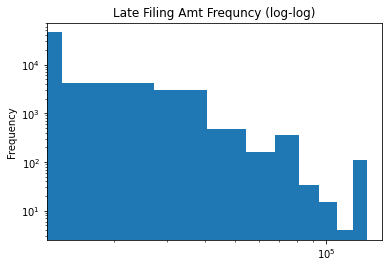

In [257]:
df["Late Filing Amt"].plot(kind='hist', loglog=True, title='Late Filing Amt Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

<AxesSubplot:title={'center':'Late Filing Amt Frequncy, values < 10^8 (log)'}, ylabel='Frequency'>

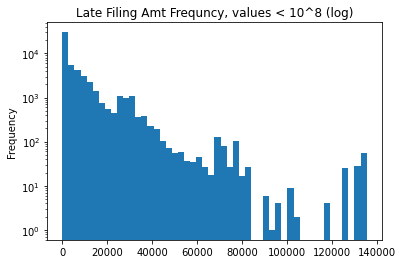

In [258]:
df.loc[df["Late Filing Amt"]<10**8]["Late Filing Amt"].plot(kind='hist', logy=True, bins=50, title='Late Filing Amt Frequncy, values < 10^8 (log)')

Plotting Failure To File Amt shows it is also roughly exponential in distribution

<AxesSubplot:title={'center':'Failure To File Amt Frequncy (log-log)'}, ylabel='Frequency'>

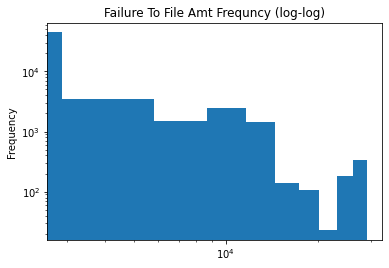

In [259]:
df["Failure To File Amt"].plot(kind='hist', loglog=True, title='Failure To File Amt Frequncy (log-log)')

<AxesSubplot:title={'center':'Failure To File Amt Frequncy, values < 10^7 (log)'}, ylabel='Frequency'>

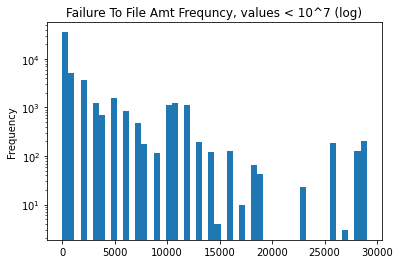

In [260]:
df.loc[df["Failure To File Amt"]<10**7]["Failure To File Amt"].plot(kind='hist', logy=True, bins=50, title='Failure To File Amt Frequncy, values < 10^7 (log)')

<AxesSubplot:title={'center':'Failure To File Collect Frequncy (log-log)'}, ylabel='Frequency'>

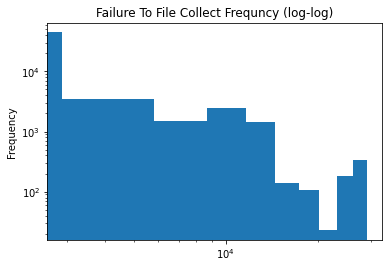

In [262]:
df["Failure To Collect Amt"].plot(kind='hist', loglog=True, title='Failure To File Collect Frequncy (log-log)')

<AxesSubplot:title={'center':'Failure To Collect Amt Frequncy, values < 10^7 (log)'}, ylabel='Frequency'>

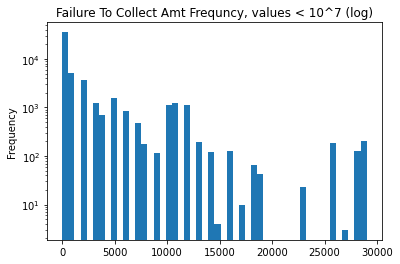

In [263]:
df.loc[df["Failure To Collect Amt"]<10**7]["Failure To Collect Amt"].plot(kind='hist', logy=True, bins=50, title='Failure To Collect Amt Frequncy, values < 10^7 (log)')

Now that we've mapped these to numerical values, we can identifiy additional issues

#### Fixing Late Filing Amts

##### these look good here:

In [264]:
df["Late Filing Amt"].min()

0.0

In [276]:
df["Failure To File Amt"].min()

0.0

In [277]:
df["Failure To Collect Amt"].min()

0.0

In [265]:
df["Late Filing Amt"].max()

135500.0

In [278]:
df["Failure To File Amt"].max()

29000.0

In [279]:
df["Failure To Collect Amt"].max()

29000.0

In [280]:
#df.loc[df['Late Filing Amt'] < 0]['Late Filing Amt']

It's likely that these values were mistakenly entered as negative, so we'll flip them to positive instead of setting them to zero

In [281]:
#df.loc[df['Late Filing Amt'] == -33000.0, 'Late Filing Amt'] = 33000.0
#df.loc[df['Late Filing Amt'] == -100.0, 'Late Filing Amt'] = 100.0

Looks fine ~This is test data:~

In [282]:
# FOLLOWING IS NO LONGER TRUE:
#the entire line is filled with fake and false information
# The street name is BIS TEST STREET, and almost every value is either the first possible value for the column type, or empty
df.loc[df['Late Filing Amt'] == df["Late Filing Amt"].max()]

,Tr6 Number,Control Number,Filing Type,Cycle,Bin,House Number,Street Name,Borough,Block,Lot,...,Filing Date,Filing Status,Prior Cycle Filing Date,Prior Status,Field Inspection Completed Date,Qewi Signed Date,Late Filing Amt,Failure To File Amt,Failure To Collect Amt,Comments
971,TR6-700730-7A-N1,700730,Auto-Generated,7,1004576.0,223,EAST 2 STREET,MANHATTAN,384,16,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
5660,TR6-706076-7A-N1,706076,Auto-Generated,7,1083930.0,1914,2 AVENUE,MANHATTAN,1669,1,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
5922,TR6-705182-7A-N1,705182,Auto-Generated,7,1043922.0,223,EAST 70 STREET,MANHATTAN,1425,13,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
7988,TR6-708040-7A-N1,708040,Auto-Generated,7,2014205.0,2205,DAVIDSON AVENUE,BRONX,3196,18,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
7989,TR6-708041-7A-N1,708041,Auto-Generated,7,2014206.0,17,WEST 182 STREET,BRONX,3196,23,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
8034,TR6-708086-7A-N1,708086,Auto-Generated,7,2015342.0,2751,UNIVERSITY AVENUE,BRONX,3249,117,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
8402,TR6-708595-7A-N1,708595,Auto-Generated,7,2097550.0,1400,PELHAM PARKWAY,BRONX,4205,1,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,NaN
8521,TR6-709597-7A-N1,709597,Auto-Generated,7,3388501.0,74,ROSS STREET,BROOKLYN,2186,1,...,NaN,No Report Filed,12/07/2004 12:00:00 AM,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,INITIAL REPORT FILED 6/3/16 WAS REJECTEDStatus...
8523,TR6-709599-7A-N1,709599,Auto-Generated,7,3388502.0,84,ROSS STREET,BROOKLYN,2186,1,...,NaN,No Report Filed,12/07/2004 12:00:00 AM,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,INITIAL REPORT FILED 6/3/16 WAS REJECTED
8524,TR6-709600-7A-N1,709600,Auto-Generated,7,3331320.0,80,ROSS STREET,BROOKLYN,2186,1,...,NaN,No Report Filed,12/07/2004 12:00:00 AM,No Report Filed,NaN,NaN,135500.0,29000.0,29000.0,INITIAL REPORT FILED 6/3/16 WAS REJECTED


We will drop this row

In [283]:
#df.drop(labels=df.loc[df['Late Filing Amt'] == 999999999].index[0], axis=0, inplace=True)

In [284]:
#df.loc[df['Late Filing Amt'] == 999999999]

These seem to be real probably

In [285]:
#df.loc[df['Late Filing Amt']>= 9000000]["Late Filing Amt"]

In [286]:
df["Late Filing Amt"].max()

135500.0

<AxesSubplot:title={'center':'Late Filing Amt Frequncy (log)'}, ylabel='Frequency'>

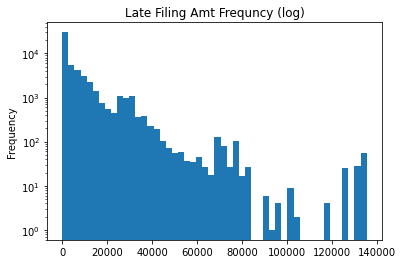

In [287]:
df["Late Filing Amt"].plot(kind='hist', logy=True, bins=50, title='Late Filing Amt Frequncy (log)')

#### Fixing Failure To File Amt

In [289]:
#df.loc[df['Failure To File Amt'] < 0 ]

We'll fix this as we did with negative monetary values before

In [290]:
#df.loc[df['Failure To File Amt'] == -85.8,  'Failure To File Amt'] = 85.8

In [291]:
df['Failure To File Amt'].max()

29000.0

Also seems to have real information

In [292]:
#df.loc[df['Failure To File Amt']==31500000.0]

### Looking at Zoning districts

In [231]:
#Residence (R), Commerical (C), Manufacturing (M)
#show_vals("Zoning District 1")
#show_vals("Zoning District 2")

Some districts may contain invalid formats

In [232]:
# .4-4 looks weird
#df["Zoning District 1"].value_counts(dropna=False)

In [233]:
#Checks for irregular values (values that do not start with (R), (C), (M))
#df["Zoning District 1"] = df["Zoning District 1"].astype('str')
#df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 1"].value_counts()

In [234]:
#Checks for irregular values (values that do not start with (R), (C), (M))
#df["Zoning District 2"] = df["Zoning District 2"].astype('str')
#df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 2"].value_counts()

In [235]:
#turning the values above into np.nan
#df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 1"]] = np.nan
#df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 2"]] = np.nan

### Looking at special districts

In [236]:
#show_vals("Special District 1")
#show_vals("Special District 2")

In [237]:
#Checks to see if there are lower case values
#df.loc[~df["Special District 1"].isna() & df["Special District 1"].str.islower()]

### Analysis

Zoning districts had some zones that were invalid such as number only values (ex.31010)  and we changed those values to nan

The typical format for Zoning districts start with C, R, and N. There are also some special districts like PARK and BPC that we also checked

Special Districts didn't have any noticable values that were out of place

In [238]:
df.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

## Quick look at GIS

In [239]:
#show_vals("LATITUDE")
#show_vals("LONGITUDE")
#show_vals("COUNCIL_DISTRICT")
#show_vals("CENSUS_TRACT")
#show_vals("NTA_NAME")
#show_vals("BIN")

Top 10 LATITUDE:

Could not print column:  LATITUDE

Top 10 LONGITUDE:

Could not print column:  LONGITUDE

Top 10 COUNCIL_DISTRICT:

Could not print column:  COUNCIL_DISTRICT

Top 10 CENSUS_TRACT:

Could not print column:  CENSUS_TRACT

Top 10 NTA_NAME:

Could not print column:  NTA_NAME



In [89]:
# Manually looking at some of these
#df[["LATITUDE", "LONGITUDE", "COUNCIL_DISTRICT", "CENSUS_TRACT", "NTA_NAME"]]

In [90]:
# shouldn't be 0
#df["LATITUDE"] = df["LATITUDE"].astype('float')
#df["LATITUDE"].min()

In [92]:
#df["LATITUDE"].max()

In [93]:
#df.loc[df["LATITUDE"] == 0.0]

#### Removed the the rows above because its obviously a filler job

In [95]:
#df = df.drop(df[df["LATITUDE"] == 0.0].index)

In [94]:
#df["LATITUDE"].min()

#### The min and max makes sense as the values range from Staten Island to the Bronx

In [96]:
#df["LONGITUDE"] = df["LONGITUDE"].astype('float')
#df["LONGITUDE"].min()

In [98]:
#df["LONGITUDE"].max()

In [99]:
#df.loc[df["LONGITUDE"] == -73.700376]

#### These longitudes and latitudes range from Queens to Staten Island which is also consistent with our dataset

In [100]:
#df["COUNCIL_DISTRICT"] = df["COUNCIL_DISTRICT"].astype('float')
#df["COUNCIL_DISTRICT"].min()

1.0

In [101]:
#df["COUNCIL_DISTRICT"].max()

51.0

#### 1-51 are all valid districts

In [102]:
#df["CENSUS_TRACT"] = df["CENSUS_TRACT"].astype('float')
#df["CENSUS_TRACT"].min()

1.0

In [103]:
#df["CENSUS_TRACT"].max()

157903.0

In [104]:
#df.loc[df["CENSUS_TRACT"] == 157903]

,BOROUGH,Bin #,House #,Street Name,Job #,Job Document #,Job Type,Self Cert,Block,Lot,...,Owner's House State,Owner's House Zip Code,Owner's Phone #,DOB Run Date,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
2405,QUEENS,4179819,84-24,259 STREET,440598471,01,A2,Y,08788,00018,...,NY,11001,9176485442,06/24/2020 00:00:00,3767505,40.736156,-73.708866,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
9939,QUEENS,4623613,84-14,261 STREET,421895747,01,NB,N,08790,00024,...,NY,11004,3476989824,03/10/2021 00:00:00,3816186,40.737110,-73.707270,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
15301,QUEENS,4180389,86-31,256 STREET,420593637,01,A2,Y,08815,00022,...,NY,11001,7188501900,07/15/2020 00:00:00,3774752,40.732155,-73.710287,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
19794,QUEENS,4615276,261-04,EAST WILLISTON AVENUE,421477994,01,A2,Y,08804,00039,...,NY,11596,9177630251,07/29/2020 00:00:00,3601856,40.735917,-73.706637,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
20332,QUEENS,4180035,85-45,256 STREET,402596847,01,NB,Y,08799,00013,...,NY,11001,5166031575,07/29/2020 00:00:00,3603581,40.733476,-73.710772,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760605,QUEENS,4179882,84-28,260 STREET,421793544,01,A2,N,08789,00049,...,NaN,NaN,9172266055,08/25/2021 00:00:00,3867333,40.736379,-73.707974,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
3761067,QUEENS,4179911,84-33,260 ST,440657139,01,A2,N,08790,00047,...,NaN,NaN,7187265500,08/28/2021 00:00:00,3869066,40.736340,-73.707938,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
3761980,QUEENS,4623613,84-14,261 STREET,421895747,01,NB,N,08790,00024,...,NaN,NaN,3476989824,09/02/2021 00:00:00,3869772,40.737110,-73.707270,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park
3764871,QUEENS,4180404,256-16,86 AVENUE,401841129,01,NB,NaN,08815,00039,...,NaN,NaN,nan,09/21/2021 00:00:00,3872349,40.732672,-73.709696,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park


#### No irregulars for census tract

In [293]:
df["Bin"] = df["Bin"].astype('float')
df["Bin"].min()

1000000.0

In [294]:
df["Bin"] = df["Bin"].astype('float')
df["Bin"].max()

5863301.0

In [295]:
df.loc[df["Bin"] == 1000000.0]

,Tr6 Number,Control Number,Filing Type,Cycle,Bin,House Number,Street Name,Borough,Block,Lot,...,Filing Date,Filing Status,Prior Cycle Filing Date,Prior Status,Field Inspection Completed Date,Qewi Signed Date,Late Filing Amt,Failure To File Amt,Failure To Collect Amt,Comments
345,TR6-700308-7B-N1,700308,Auto-Generated,7,1000000.0,30,WEST BROADWAY,MANHATTAN,127,1,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,NaN,NaN,NaN,THIS ENTIRE STRUCTURE WAS DEMO. SIGNED OFF 12/...
417,TR6-700160-7A-N1,700160,Auto-Generated,7,1000000.0,5,ALBANY STREET,MANHATTAN,54,1,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,NaN,NaN,NaN,BUILDING UNDER DEMOLITION - DEUTCHE BANK.(KD)
1662,TR6-701439-7B-N1,701439,Auto-Generated,7,1000000.0,517,WEST 35 STREET,MANHATTAN,707,20,...,NaN,No Report Filed,10/31/2007 12:00:00 AM,SWARMP,NaN,NaN,NaN,NaN,NaN,BLDG DEMO BY CITY - ACQUIRED BY EMINENT DOMAIN...
2807,TR6-703220-7A-N1,703220,Auto-Generated,7,1000000.0,225,WEST 57 STREET,MANHATTAN,1029,14,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,NaN,NaN,NaN,BLDG DEMO - JOB # 121380647.SIGNED OFF 03/01/2...
2808,TR6-703221-7A-N1,703221,Auto-Generated,7,1000000.0,221,WEST 57 STREET,MANHATTAN,1029,19,...,NaN,No Report Filed,02/14/2007 12:00:00 AM,SWARMP,NaN,NaN,NaN,NaN,NaN,1 THRU 12FL WAS DEMO (FULL DEMOLITION) JOB#110...
3079,TR6-704501-7B-N1,704501,Auto-Generated,7,1000000.0,610,LEXINGTON AVENUE,MANHATTAN,1307,59,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,NaN,NaN,NaN,FULL DEMOLITION (SIGNED OFF 2/21/08)
4891,TR6-702947-7B-N1,702947,Auto-Generated,7,1000000.0,417,EAST 35 STREET,MANHATTAN,967,1,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,NaN,NaN,NaN,THE ENTIRE BLDG WAS DEMOLISH JOB# 103250535 SI...
5661,TR6-706077-7A-N1,706077,Auto-Generated,7,1000000.0,1880,SECOND AVENUE,MANHATTAN,1669,1,...,NaN,No Report Filed,NaN,No Report Filed,NaN,NaN,NaN,NaN,NaN,AS PER BIS PROPERTY PROFILE ADDRESS NOT IN PRO...
6177,TR6-706318-7B-N1,706318,Auto-Generated,7,1000000.0,441,CENTRAL PARK WEST,MANHATTAN,1840,29,...,NaN,No Report Filed,02/20/2007 12:00:00 AM,SAFE,NaN,NaN,NaN,NaN,NaN,NaN
14055,TR6-712818-7A-I1,712818,Initial,7,1000000.0,300,EAST 44 STREET,MANHATTAN,1336,7502,...,10/19/2010 12:00:00 AM,SAFE,02/21/2007 12:00:00 AM,SWARMP,08/20/2010 12:00:00 AM,10/12/2010 12:00:00 AM,NaN,NaN,NaN,DUP ADDRESS ON LOCAL LAW 11/98. - SAME AS 814 ...


In [296]:
df.loc[df["Bin"] == df["Bin"].max()]

,Tr6 Number,Control Number,Filing Type,Cycle,Bin,House Number,Street Name,Borough,Block,Lot,...,Filing Date,Filing Status,Prior Cycle Filing Date,Prior Status,Field Inspection Completed Date,Qewi Signed Date,Late Filing Amt,Failure To File Amt,Failure To Collect Amt,Comments
46825,TR6-916984-9A-I1,916984,Initial,9,5863301.0,1,DEP PLAZA,STATEN ISLAND,99999,1,...,06/28/2020 12:00:00 AM,UNSAFE,NaN,No Report Filed,06/18/2020 12:00:00 AM,06/24/2020 08:00:00 PM,0.0,0.0,0.0,NaN


#### Nothing wrong with GIS BIN either

# Data Profilling for datetime columns


Find format problems and outliers in all datetime columns

Using openclean's sklearn modules to detect problems and outliers

In [297]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

def findDateOutliers(column_name, eps_setting = 0.05):
    datetime_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(datetime_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(datetime_data)))
    print(DBSCANOutliers().find(datetime_data))
    print(DBSCANOutliers(eps = eps_setting).find(datetime_data))
    print('\n==================================')

In [298]:
date_cols = []

print("Datetime Data columns:\n")
for col in ds.columns:
    if 'Date' in col or 'DATE' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.02)

Datetime Data columns:

FILING_DATE
PRIOR_CYCLE_FILING_DATE
FIELD_INSPECTION_COMPLETED_DATE
QEWI_SIGNED_DATE
----------------------------

Column:  FILING_DATE
1.                 7,961
2.  02/21/2007 12:00:00 AM       1,215
3.  02/20/2007 12:00:00 AM         733
4.  02/21/2012 12:00:00 AM         642
5.  02/21/2017 12:00:00 AM         464
6.  02/16/2007 12:00:00 AM         408
7.  08/21/2012 12:00:00 AM         351
8.  02/21/2013 12:00:00 AM         350
9.  08/20/2012 12:00:00 AM         347
10. 02/21/2019 12:00:00 AM         323

Total number of distinct values in FILING_DATE is 4318
['']
['', '02/21/2007 12:00:00 AM', '02/21/2012 12:00:00 AM', '02/20/2007 12:00:00 AM']

Column:  PRIOR_CYCLE_FILING_DATE
1.                15,422
2.  02/21/2007 12:00:00 AM       1,288
3.  02/21/2002 12:00:00 AM         982
4.  02/20/2007 12:00:00 AM         768
5.  03/01/2000 12:00:00 AM         664
6.  02/29/2000 12:00:00 AM         551
7.  02/21/2012 12:00:00 AM         447
8.  02/16/2007 12:00:00 AM 

Number Remember that after changing some of the column names, there are some columns that are also datetime data:

"Paid": "Paid Date"\
"Fully Paid": "Fully Paid Date"\
"Assigned": "Assigned Date"\
"Approved": "Approved Date"\
"Pre- Filing Date": "Pre-Filing Date"\
"DOB Run Date": "DOB Run Date"\
"SIGNOFF_DATE": "Signoff Date"\
"SPECIAL_ACTION_DATE": "Special Action Date"\

In [300]:
##date_cols = ["Filing Date","Issuance Date","Expiration Date","Job Start Date", "DOB Run Date"]

for col in date_cols:
    findDateOutliers(col, 0.02)

Column:  FILING_DATE
1.                 7,961
2.  02/21/2007 12:00:00 AM       1,215
3.  02/20/2007 12:00:00 AM         733
4.  02/21/2012 12:00:00 AM         642
5.  02/21/2017 12:00:00 AM         464
6.  02/16/2007 12:00:00 AM         408
7.  08/21/2012 12:00:00 AM         351
8.  02/21/2013 12:00:00 AM         350
9.  08/20/2012 12:00:00 AM         347
10. 02/21/2019 12:00:00 AM         323

Total number of distinct values in FILING_DATE is 4318
['']
['', '02/21/2007 12:00:00 AM', '02/21/2012 12:00:00 AM', '02/20/2007 12:00:00 AM']

Column:  PRIOR_CYCLE_FILING_DATE
1.                15,422
2.  02/21/2007 12:00:00 AM       1,288
3.  02/21/2002 12:00:00 AM         982
4.  02/20/2007 12:00:00 AM         768
5.  03/01/2000 12:00:00 AM         664
6.  02/29/2000 12:00:00 AM         551
7.  02/21/2012 12:00:00 AM         447
8.  02/16/2007 12:00:00 AM         420
9.  02/28/2000 12:00:00 AM         332
10. 02/15/2007 12:00:00 AM         317

Total number of distinct values in PRIOR_CYCLE_F

# Analysis

the above results show the problems for the data cleaning task:
    
### Latest Action Date
outliers: '06//1403'
format: 'yyyy-mm-dd' and 'mm/dd/yyyy'

### Pre- Filing Date
no problem found

### DOB Run Date
format: 'yyyy-mm-dd' and 'mm/dd/yyyy 00:00:00'

### SIGNOFF_DATE
outliers: empty value

### SPECIAL_ACTION_DATE
outliers: empty value and '11//2006'

### Paid
outliers: empty value

### Fully Paid
outliers: empty value

### Assigned
outliers: empty value

### Approved
outliers: empty value

Number Data Cleaning for outliers in datetime columns

## Fixing Datetime columns format

In [301]:
# datetime_column_list = []
# for col in ds.columns:
#     if 'Date' in col or 'DATE' in col:
#         print(col)
#         datetime_column_list.append(col)

for col in date_cols:
    show_vals(rename_dict[col])

Top 10 Filing Date:

NaN                       7955
02/21/2007 12:00:00 AM    1215
02/20/2007 12:00:00 AM     733
02/21/2012 12:00:00 AM     642
02/21/2017 12:00:00 AM     464
02/16/2007 12:00:00 AM     408
08/21/2012 12:00:00 AM     351
02/21/2013 12:00:00 AM     350
08/20/2012 12:00:00 AM     347
02/21/2019 12:00:00 AM     323
Name: Filing Date, dtype: int64

Top 10 Prior Cycle Filing Date:

NaN                       15416
02/21/2007 12:00:00 AM     1288
02/21/2002 12:00:00 AM      982
02/20/2007 12:00:00 AM      768
03/01/2000 12:00:00 AM      662
02/29/2000 12:00:00 AM      551
02/21/2012 12:00:00 AM      447
02/16/2007 12:00:00 AM      420
02/28/2000 12:00:00 AM      332
02/15/2007 12:00:00 AM      317
Name: Prior Cycle Filing Date, dtype: int64

Top 10 Field Inspection Completed Date:

NaN                       11837
11/01/2006 01:00:00 AM      125
02/15/2012 12:00:00 AM      120
12/01/2006 12:00:00 AM      117
02/12/2007 12:00:00 AM      109
01/30/2007 12:00:00 AM      104
02/13

Check to see if any columns have values in year-month-day format

In [302]:
# for col in date_cols:
#     print(col, '\n', df.loc[df[col].str.contains('-', regex=False, na=False)][col], '\n\n')

#### Fix the remaining Datetime columns

In [303]:
for col in date_cols:
    print(col)
    df.loc[:,rename_dict[col]] = pd.to_datetime(df[rename_dict[col]])

FILING_DATE
PRIOR_CYCLE_FILING_DATE
FIELD_INSPECTION_COMPLETED_DATE
QEWI_SIGNED_DATE


These should all be proper datetime64[ns] columns now:

In [304]:
df.select_dtypes(include='datetime')

,Filing Date,Prior Cycle Filing Date,Field Inspection Completed Date,Qewi Signed Date
0,NaT,NaT,NaT,NaT
1,NaT,NaT,NaT,NaT
2,NaT,NaT,NaT,NaT
3,NaT,NaT,NaT,NaT
4,NaT,NaT,NaT,NaT
...,...,...,...,...
55297,2017-03-27,2012-07-19,2017-09-27,2017-11-23 19:00:00
55298,NaT,2013-03-21,2017-09-27,NaT
55299,2017-02-21,2013-07-19,2017-02-08,2017-02-21 00:00:00
55300,2017-02-21,2013-03-12,2017-08-30,2017-09-23 00:00:00


In [305]:
#for col in datetime_column_list:
#    show_vals(col)

### Check the coherence of datetime values

~These don't make sense, but it's not entirely clear if they should be swapped, or removed or what~

All these are okay!


In [306]:
# df.loc[(df['Field Inspection Completed Date'] > df['Filing Date'])
#       &(~df['Field Inspection Completed Date'].isna() & ~df['Filing Date'].isna())][['Field Inspection Completed Date', 'Filing Date']]

In [307]:
# df.loc[(df['Expiration Date'] < df['Issuance Date'])
#       &(~df['Expiration Date'].isna() & ~df['Issuance Date'].isna())][['Expiration Date', 'Issuance Date']]

Good, no expirations before issuance

Here it's not clear how a job could start after the issuance expires, but this may have actually happened

In [308]:
# df.loc[(df['Job Start Date'] > df['Expiration Date'])
#       &(~df['Job Start Date'].isna() & ~df['Expiration Date'].isna())][['Job Start Date', 'Expiration Date']]

##### These are, however a small percentage of of our total jobs

Fraction of jobs Assigned after they were already approved out of total jobs

In [309]:
#df.loc[df['Job Start Date'] > df['Expiration Date']]['Job Start Date'].count()/df['Job Start Date'].count()

Number Data Profilling for City and Other Description

Find format problems and outliers in City and Description columns

Using openclean's sklearn modules to detect problems and outliers

In [310]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [311]:
date_cols = ["Comments"]

In [312]:
date_cols = ["COMMENTS"]
print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

----------------------------

Column:  COMMENTS
1.                38,944
2.  N.Y.C.H.A         373
3.  RESUBMISSION         315
4.  ALTERNATIVE PROGRAM         243
5.  DATA ENTERED BY RT         197
6.  NEW YORK CITY HOUSING AUTHORITY         176
7.  CITY OWNED         150
8.  CITY OWNED NO PENALTY         122
9.  AMENDED FILING: OWNER: MARTHA BRAZOBAN         120
10. ADDED TO CYCLE 6          41

Total number of distinct values in COMMENTS is 8886
['', 'CYCLE 4 & 5 OLD LOT WAS 17 NEW IS 7502', '61367829/61367828 CAW', '(718-644-7697)', 'RESUBMISSIONPENALTY PAID 61352750 3,000', 'SUB CYCLE 7A-8A', 'CW 2/20/13', '61341190 CAW 11/19/13', '#NAME?', 'P', 'E-MAIL', '61403016 CAW', 'N Y C H A NO LATE FEE DUE', 'etwryeryeruet', 'eryryeryeryetseteryrweryeetuwetwywry', 'NYCHA', 'C/O P & L', 'RESUB 08/5/2014LATE PENALTY PAID 7/18/16 ($5250) INV # 61711851 & 61711853 (JB)', 'setwtryddfhdeteywryeyerueu', 'OLD LOT WAS (12)', 'eryeryetuetwrywrwerterwsetwetwryeteryeryeu', 'DBA HOTEL 31 INC', 'OLD LOT

Number Analysis

the above results show the problems for the data cleaning task:
    
### For City

There are many misspellings and abbreviations for city names. We can use both clustering and Soundex to detect misspellings and abbreviations. And we can check if our cleaning is right by refer to the U.S. Cities reference datasets in openclean.


### For Other Description

Other Description can be anything, so we just care about empty value and values that are too similar and are showing exactly same things (for example 'GC' and '___GC')

In [313]:
from openclean.function.eval.base import Col, Eval
from openclean.function.eval.logic import And
from openclean.function.value.phonetic import Soundex, soundex

In [316]:
upper = ds\
    .select("QEWI_CITY")\
    .update("QEWI_CITY", str.upper)

In [317]:
from openclean.data.refdata import RefStore

refdata = RefStore()
city_df = refdata\
    .load('encyclopaedia_britannica:us_cities', auto_download=True)\
    .df()


In [318]:
city_list = city_df['city']
print(city_list)

0          Demopolis
1          Sylacauga
2               Troy
3             Dothan
4           Prichard
            ...     
1956          Powell
1957        Riverton
1958        Sheridan
1959    Rock Springs
1960         Buffalo
Name: city, Length: 1961, dtype: object


Number An example of using soundex in openclean

However, using soundex for each of the city is too slow, the code below take nearly 4 mins for one sningle city.\
So we should use clustering first and then use hard code to clean the remianing city name that is not in the city_list.

In [320]:
brooklyn = ds\
    .select("QEWI_CITY")\
    .update("QEWI_CITY", str.upper)\
    .filter(And(Eval("QEWI_CITY", Soundex()) == soundex('BROOKLYN'), Col("QEWI_CITY") != 'BROOKLYN'))\
    .distinct()

print('RANK\tCOUNT\tNAME')
for i, entry in enumerate(brooklyn.most_common()):
    key, count = entry
    print('{}.\t{}\t{}'.format(i + 1, count, key))

RANK	COUNT	NAME
1.	3	BROOKYLN
2.	2	BROOKLY
3.	1	BROOKYLYN
4.	1	BROKLYN
5.	1	BROOKLYNN
6.	1	BROOKLYNK
7.	1	BROOKLUN
8.	1	BROOKLYN,


Number Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

Number Transform all city names to upper case

### Remember that we have changed some column names:
"City ": "Owner's House City"\
"State": "Owner's House State"

In [321]:
df["Qewi City"] = df["Qewi City"].str.upper()

In [322]:
# Convert similar values to suggested value using kNN clustering

In [323]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2, preds = 0.5):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(preds)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i <5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
    
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [331]:
date_cols = ["QEWI_CITY"]#,'Other Description' ]


# print("kNN cluster for ", "Qewi City")
# col_clusters = getClusters("Qewi City ")
# print("updating column ", "Qewi City")
# print("----------------------\nTop 5 Cluster:\n----------------------")
# updateUsingClusters("Qewi City", col_clusters, True)
print("================")

print("kNN cluster for ", date_cols[0])
col_clusters = getClusters(date_cols[0])
print("updating column ", date_cols[0])
print("----------------------\nTop 5 Cluster:\n----------------------")
updateUsingClusters("Qewi City", col_clusters, True)
print("================")

kNN cluster for  QEWI_CITY
updating column  QEWI_CITY
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 14)

NEW YORK CITY (50)
NEW YOKK (1)
NEW YORL (5)
NEW YORKN (1)
.NEW YORK CITY (1)
NEW YORKE (1)
NEW YOEK (2)
NEW YORK NY (2)
NEW YORM (2)
MEW YORK (5)
.......4 more items

Suggested value: NEW YORK


Cluster 1 (of size 12)

NEW YORK (27480)
NEW YORK CITY (50)
NEW YOKK (1)
NEW YORKN (1)
NEW YORKE (1)
NEW YOEK (2)
NEW YORK NY (2)
NEW YORM (2)
MEW YORK (5)
VEW YORK (1)
.......2 more items

Suggested value: NEW YORK


Cluster 2 (of size 12)

ROSLYN HEIGHTS (50)
JACKSON HEIGHTS (3)
ROSLYN HEIGHT (1)
BKYN HEIGHTS (1)
ARLINGTON HEIGH (5)
ARLINGTON HGT (1)
ARLINGTON HGHS (1)
ARLINGTON HGTS (2)
ARLINGTON HGHTS (1)
ARLINGTON (21)
.......2 more items

Suggested value: ROSLYN HEIGHTS


Cluster 3 (of size 12)

ARLINGTON HEIGH (5)
ARLINGTON HGT (1)
IRVINGTON (27)
WASHINGTON (115)
ARLINGTON HGHS (1)
ARLINGTON HGTS (2)
PT WASHINGTON (1)
ARLINGTON HGHTS (1)
HUNTINGTON (

In [151]:
# After clustering, find data that is not in the reference city dataset, hard code to clean them

In [332]:
upper_city_list = []
for item in city_list:
    upper_city_list.append(str(item.upper()))

outlier_cities = df.loc[(~df['Qewi City'].str.upper().isin(upper_city_list)) & (~df['Qewi City'].isna())]['Qewi City'].drop_duplicates()
print(outlier_cities)

18             NEW YORK
20            HARTSDALE
33             NEW CITY
37       ROSLYN HEIGHTS
40          DOBBS FERRY
              ...      
49972          WALDWICK
51477      HOLLIS HILLS
51904         BROOKLYN,
54079          SECAUCUS
55188          GLENOAKS
Name: Qewi City, Length: 435, dtype: object


In [153]:
# Print standardized cities and found outliers

In [333]:
standardized_cities = df.loc[(df['Qewi City'].str.upper().isin(upper_city_list)) & (~df['Qewi City'].isna())]['Qewi City'].drop_duplicates()
print(standardized_cities)

35          YONKERS
75       GREAT NECK
108      OYSTER BAY
133         BEDFORD
167        BROOKLYN
            ...    
47665      GUILFORD
47768     MONTCLAIR
48658     GREENWICH
48689     ARLINGTON
51871    UNION CITY
Name: Qewi City, Length: 87, dtype: object


In [334]:
outlier_city_list = []
for item in outlier_cities:
    outlier_city_list.append(str(item))
    
print(outlier_city_list)

['NEW YORK', 'HARTSDALE', 'NEW CITY', 'ROSLYN HEIGHTS', 'DOBBS FERRY', 'HAZLET', 'ENGLEWOOD CLIFF', 'PINE BROOK', 'LONG ISLAND CIT', 'LIC', 'MOUNT KISCO', 'LONG ISLAND CTY', 'BAYSIDE', 'PATCHOGUE', 'GARDEN CITY PRK', 'EAST BRUNSWICK', 'JERICHO', 'ROSELAND', 'VALLEY STREAM', 'LYNDHURST', 'HARRIMAN', 'PELHAM', 'NYC', 'ENGLEWOOD CLFS', 'NORTH BELLMORE', 'L.I.C', 'LYNBROOK', 'REGO PARK', 'HAWTORNE', 'NANUET', 'ROSLYN', 'CROTON ON HUDSO', 'ROWAYTON', 'RIDGEFIELD', 'BLAUVELT', 'JAMAICA', 'CENTRAL VALLEY', 'FLORAL PARK', 'HAMBURG', 'WOODMERE', 'WEST HEMPSTEAD', 'BOGOTA', 'BEDRORD', 'DOBS FERRY', 'WEST NYACK', 'GARDEN CITY PAR', 'ROSLYN HTS', 'LONG ISLAND CT', 'GARDEN CITY PK', 'MANALAPAN', 'HAWTHORNE', 'VALHALLA', 'HALET', 'DOBBS', 'OSINING', 'TEANAFLY', 'WOODSIDE', 'KATONAH', 'ENGLEWOODS CLIF', 'MASPETH', 'RAHWAY', 'TENAFLY', 'UNIONDALE', 'CRANBURY', 'SEAFORD', 'BROOKVILLE', 'PRLHAM', 'HAMBURGG', 'NY', 'MOUNTAINSIDE', 'LITTLE NECK', 'HAMBERG', 'HUNTINGTON STA', 'PEARL RIVER', 'DUMONT', 'GLEN

In [156]:
# Search for similar city names in reference city dataset, and hard code to replace those outliers

In [335]:
def findCityName(str):
    print(city_df['city'].loc[city_df['city'].str.contains(str)].drop_duplicates())
    print("------------------------\n")
    
findCityName("Rich")
findCityName("Island")
findCityName("White")
findCityName("Philadelphia")
findCityName("Morris")
findCityName("Nassau")
findCityName("Westchester")
  

137       Richmond
1728    Richardson
1860      Richland
Name: city, dtype: object
------------------------

498       Rock Island
1060     Grand Island
1286    Staten Island
1294     Coney Island
Name: city, dtype: object
------------------------

363             White Springs
1266             White Plains
1881    White Sulphur Springs
Name: city, dtype: object
------------------------

997         Philadelphia
1418    New Philadelphia
Name: city, dtype: object
------------------------

1151    Morristown
Name: city, dtype: object
------------------------

Series([], Name: city, dtype: object)
------------------------

Series([], Name: city, dtype: object)
------------------------



In [337]:
outlier_city_list = ['NEW YORK', 'BKLYN', 'ROOKLYN', 'RICHMOND HILL', 'BX', 'NY', 'OLD WESTBURY', 'N.Y.', 'HOLLIS', 'MAHATTAN', 'LAKE SUCCESS', 'BROKKLYN', 'BETHESDA', 'JAMAICA', 'SECAUCUS', 'LIC', 'MASPETH', 'JAMAICA ESTATES', 'SOUTH OZONE PAR', 'BAYSIDE', 'JAM', 'PARMUS', 'KEW GARDENS', 'WOONSECKET', 'LI', 'ST. ALBANS', 'MASSAPEQUA', 'SI', 'FLORAL PARK', 'ROSLYN HEIGHTS', 'HOWARD BEACH', 'WHITEPLAINS', 'JACKSON HEIGHTS', 'REGO PARK', 'NEW HYDE PARK', 'REGO', 'ARVERNE', 'OZONE PARK', 'VALLEY STREAM', 'NEPONSIT', 'ROCKVILLE CENTR', 'BRIARWOOD', 'BRKLYN', 'MOUNT LAUREL', 'QUEEEN', 'ELMSFORD', 'NYC', 'GILLFORD', 'PARSIPPANY', 'WOODSIDE', 'LONG ISLAND CIT', 'QUEEN', 'VAALLEY STREAAM', 'BRONS', 'COLLEGE POINT', 'ROCKAWAY POINT', 'DOUGLASTON', 'ENGLEWOOD CLIFF', 'QNS', 'LYNBROOK', 'SYOSSET', 'FRESH MEADOWS', 'LITTLE NECK', 'WOODHAVEN', 'HARTSDALE', 'ATLANTIC BEACH', 'SAN JUAN CAPIST', 'CALDE PLACE', 'RIVERDALE', 'TUCKAHOE', 'SEAFORD', 'L.I.C.', 'REGO PK', "B'KLYN"]
clean_city_list = ['NEW YORK CITY', 'BROOKLYN', 'BROOKLYN', 'RICHMOND', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'MANHATTAN', 'NEW YORK CITY', 'BROOKLYN', 'BETHESDA', 'NEW YORK CITY', 'SECAUCUS', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'PARAMUS', 'NEW YORK CITY', 'WOONSOCKET', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'STATEN ISLAND', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'WHITE PLAINS', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'BROOKLYN', 'PHILADELPHIA', 'QUEEENS', 'NEW YORK CITY', 'NEW YORK CITY', 'GILLFORD', 'MORRIS', 'NEW YORK CITY', 'LONG ISLAND CITY', 'QUEENS', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'QUEENS', 'NEW YORK CITY', 'NASSAU', 'QUEENS', 'QUEENS', 'WOODHAVEN', 'NEW YORK CITY', 'NASSAU', 'SAN JUAN CAPISTRANO', 'BROOKLYN', 'RIVERDALE', 'STATEN ISLAND', 'NASSAU', 'LONG ISLAND CITY', 'QUEENS', "BROOKLYN"]

df['Qewi City'] = df['Qewi City'].replace(outlier_city_list, clean_city_list)

In [338]:
# Check State Column

In [340]:
state_col = 'QEWI_STATE'
findDateOutliers(state_col, 0.1)

Column:  QEWI_STATE
1.        NY      43,831
2.                 7,576
3.        NJ       3,259
4.        CT         387
5.        N.         112
6.        VA          40
7.        MD          24
8.        FL          24
9.        PA          17
10.       IL          14

Total number of distinct values in QEWI_STATE is 17
['', 'Florida', 'NY', 'N.']



In [341]:
ds.select('QEWI_STATE').distinct()

Counter({'': 7576,
         'NY': 43831,
         'NJ': 3259,
         'VA': 40,
         'MD': 24,
         'CT': 387,
         'ND': 4,
         'PA': 17,
         'IL': 14,
         'TX': 1,
         'NE': 6,
         'DC': 3,
         'FL': 24,
         'WA': 1,
         'NH': 1,
         'Florida': 2,
         'N.': 112})

In [ ]:
# Find functional dependencies violations on City -> State

In [343]:
from openclean.operator.collector.count import distinct
from openclean.operator.map.violations import fd_violations

groups = fd_violations(df, lhs='Qewi City', rhs='Qewi State')

print('City         \t|            State')
print('=============\t|  ===============')
for key in groups:
    conflicts = distinct(groups.get(key), 'Qewi State').most_common()
    state, count = conflicts[0]
    print('{:<12} \t| {} x {}'.format(key, count, state))
    for state, count in conflicts[1:]:
        print('             \t| {} x {}'.format(count, state))
    print('-------------\t|  ---------------')

City         	|            State
=============	|  ===============
nan          	| 7569 x nan
             	| 404 x NY
             	| 80 x NJ
             	| 6 x CT
             	| 2 x FL
             	| 1 x Florida
-------------	|  ---------------
NEW YORK CITY 	| 30973 x NY
             	| 211 x NJ
             	| 112 x N.
             	| 3 x NE
             	| 1 x NH
-------------	|  ---------------
YONKERS      	| 2098 x NY
             	| 1 x NJ
-------------	|  ---------------
HAZLET       	| 227 x NJ
             	| 2 x NY
-------------	|  ---------------
EAST BRUNSWICK 	| 87 x NJ
             	| 3 x NY
-------------	|  ---------------
LYNDHURST    	| 26 x NJ
             	| 2 x NY
-------------	|  ---------------
FAIRFAX      	| 19 x VA
             	| 1 x NY
-------------	|  ---------------
EDISON       	| 89 x NJ
             	| 4 x NY
-------------	|  ---------------
NEWARK       	| 88 x NJ
             	| 2 x NY
-------------	|  ---------------
L.I.C        	| 211 x NY
    

In [ ]:
#There is a row that has "NEW YORK CITY" as city, but have "NJ" as State, fix its state to "NY"

In [347]:
index = df['Qewi State'].loc[(df['Qewi City'] == "NEW YORK CITY") & (df['Qewi State'] == "NJ")].index[0]
df['Qewi State'].update(pd.Series(['NY'], index = [index]))

In [348]:
df['Qewi State'].loc[(df['Qewi City'] == "NEW YORK CITY") & (df['Qewi State'] == "NJ")]

107      NJ
173      NJ
363      NJ
364      NJ
379      NJ
         ..
36606    NJ
36607    NJ
36866    NJ
37946    NJ
37948    NJ
Name: Qewi State, Length: 209, dtype: object

In [349]:
# Apply similar operation on Owner Bus Name

In [352]:
#bn_col = "Qewi Bus Name"
#findDateOutliers(bn_col)

In [353]:
# Using clustering for Business Name takes too much time, we can only clean those empty data for now 

In [354]:
#df[bn_col] = df[bn_col].replace(['N/A', '', 'NA','NONE'], [None,None,None,None])

### Data Profilling for applicant columns

#Find format problems and outliers in all applicant columns

#Using openclean's sklearn modules to detect problems and outliers

In [355]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [356]:
# date_cols = []

# print("Qewi Data columns:\n")
# for col in ds.columns:
#     if 'Applicant' in col:
#         print(col)
#         date_cols.append(col)

Applicant Data columns:



In [ ]:
# date_cols = []

# print("Applicant Data columns:\n")
# for col in ds.columns:
#     if 'Applicant' in col:
#         print(col)
#         date_cols.append(col)

# print("----------------------------\n")        
        
# for col in date_cols:
#     findDateOutliers(col, 0.1)

In [357]:
# Analysis

#the above results show the problems for the data cleaning task:
    
### For name data

#in "Applicant's First Name", "Applicant's Last Name", "Applicant Professional Title", there are many outliers which are illegal input, and there are many similar values. We need first converts evident outliers to legal values, then use kNN clusterer to standardize similar values.


### Applicant License Number

#Applicant License Number is made of 6 digits, there are outliers that do not satisfy the 6-digit format. We can not use kNN clusterer to standardize because many License Number are similar. 

In [358]:
# Data Cleaning for Applicant columns

#* how to deal with empty values has not decided yet

In [359]:
# Number mapping list to replace outliers
# outlier1 = ['', 'MR. ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM 11', 'JOSEP;H``', 'DAID/11/2007', 'CHUNG   LUN', '718 9215010', 'ANTHONY', 'HSIA0-NAN', 'JOSEPH', '``````````', 'ROBERT  `', 'RAJENDRA9956700', '2', 'G.B.M.', 'EUGENE......JR', '6312100', 'CLAUDE,JR.', 'THOMAS``', 'ALAN  L', 'Nab53', 'MR. Y. B', 'J.J', 'PH8ILIP', 'I. M', 'RICHARD', 'ALBERTA S 111 D', 'P ;', 'GENECG.C. ENG &', 'J.J.', '2126202794', 'SHAW  HWA', 'HARRY         H', 'MR DOU8GLAS', '`1D', 'PAUL', 'K. T.', 'JOHN', '...NORMAN', 'EVAN   D', '7184361278BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MAD/Y/ARNI', 'ES ON SCH B', 'EUGENE.......JR', 'NEAL', 'F._ERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0-TECH', 'RODNEY   __', 'DAVID', 'G. L.', 'JAMES', 'LESLI8E', '7186054055', 'GEORGE', 'G.B.M', 'DAVID    JON', 'CHUNG---YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', '1P', 'JUDE.....N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD/HON-AN', 'GLEN  A.L.', 'J.B. Jr.', 'LORENZO..A', 'J J', '..RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY 2', '...JOSEPH', 'RUSSELL 111', 'THOMAS', 'H./E./CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', '--young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']
# mapping1 = [None, 'ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM', 'JOSEPH', None, 'CHUNG LUN', None, 'ANTHONY', 'HSIA0 NAN', 'JOSEPH', None, 'ROBERT', 'RAJENDRA', None, 'G.B.M.', 'EUGENEJR', None, 'CLAUDE JR.', 'THOMAS', 'ALAN  L', 'Nab', 'MR. Y. B', 'J.J', 'PHILIP', 'I. M', 'RICHARD', 'ALBERTA', None, 'GENECG.C. ENG', 'J.J.', None, 'SHAW HWA', 'HARRYH', 'MR DOUGLAS', None, 'PAUL', 'K. T.', 'JOHN', 'NORMAN', 'EVAND', 'BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MADYARNI', 'ES ON SCH B', 'EUGENEJR', 'NEAL', 'FERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0 TECH', 'RODNEY', 'DAVID', 'G. L.', 'JAMES', 'LESLIE', None, 'GEORGE', 'G.B.M', 'DAVID JON', 'CHUNG YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', None, 'JUDE N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD HON-AN', 'GLEN A.L.', 'J.B. Jr.', 'LORENZOA', 'J J', 'RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY', 'JOSEPH', 'RUSSELL', 'THOMAS', 'H.E.CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', 'young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']

# outlier2 = ['SHARMA Number0', "0'CONNOR", 'RUSHTON    UEL', 'UDDIN   Z', 'HINKLEY 1', 'O&Number039;CONNOR, P.E.', '.OOK', 'SAMUELS111', 'O&Number039;CONNOR', 'CALIENDO', 'SMITH   JR.', 'LO  BUE', '7AN', '+-+ETTIERI', 'SMITH, 111', 'KAMEN   1', '.EE', 'MASS, 1', '.EI', 'Zagaroli 3rd', 'RINI   II', 'KAMEN   R', 'RYAN 11', 'SPI8EZIA L S', 'MUFTIC..A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL, P.E.', 'HAMA07', 'HINLEY,1', '1212', "O  ' CONNELL", 'HURT,JR.,', 'WESOLOWSKI', 'CHEN', '`ING, R.A', 'MARTARELLA 111', 'Gandhi, Ph.D., P.E.', '90I', 'ENNIS 2', 'COSTELLO R A A I A', '3UI', 'N/A', 'HURT,  JR', 'LEHR,1', 'KOHLER, 111', 'GERAZOUNIS', 'Alexander,1', 'LUBOW, R.A. LEED AP', 'RINI,111', '08CZAK', '````````````````````', 'CHAO  R.A.', 'Geier 11', '08NGEL', '08SOLOWSKI', 'I11', 'HINKLEY, 1', 'RUDIKOFF, P.E.', "O'CONNOR", 'SHAH   EZ', 'MIELE, JR., P.E.', 'RITTENHOUSE 111', 'AMADI   ISIOFIA', 'HINKLEY,1', 'RENFORE````````', "O'HARA,JR.", '73020012', 'PHAGOO   I', 'BRAY.....,', 'LLL', 'BHATHIA,1', 'GANDHI, PH. D., P.E', 'KO K', 'VASSALOTTI 11', 'HURT, JR .', '0018LKLE', 'RINI -111', 'PARIHAR', 'EE', 'L00802', 'ELISE.111', 'KING , R.A', 'CHRYSLER  P E', 'LEHR 1', 'Walters   Jr.', 'LEE', 'RINI  III', 'D&Number039;ANGELO', '0UDOLPH III', 'VIEHE-NAESS 111', ',MO', '08E', '47DIKOFF', 'Yu,', '420865380', 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', '901BEN', '4153LOO', 'SYED-NAQVI', 'RYAN , JR.', 'K O K O R I S', 'ELISEO111', 'O&Number039;CONNELL', 'ZEID61', '---Lewis', '00CHELI', 'MOHAMMAD       +++++', 'METZLER  P E', 'BAILEY', 'GANDHI, PH. D., P.E.', 'TIEMANN.111', 'SMITH.111', 'DI GER0NIMO', 'GANDHI, PH,D., P.E', 'III', 'J C', 'MAGAMI-QAIM-MAGAMI', '+M', 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', 'Y10007OR', 'SMITH,111', 'KING R A FAIA', 'RYAN III, AIA', '08AN', 'STARK 1', 'MASS', 'VICTORI0, R.A', 'RIZVI   A', '21029677', "3'CONNOR", 'Wong /  Lai', 'KAPLAN 3', 'GRAICHEN.JR./DAWN/DI', 'GROSSMAN ,PE,F.A.C.I']
# mapping2 = ['SHARMA ', "CONNOR", 'RUSHTON UEL', 'UDDIN Z', 'HINKLEY ', 'CONNOR P.E.', None, 'SAMUELS', 'CONNOR', 'CALIENDO', 'SMITH JR.', 'LO BUE', None, 'ETTIERI', 'SMITH', 'KAMEN', '.EE', 'MASS', '.EI', 'Zagaroli', 'RINI', 'KAMEN R', 'RYAN', 'SPIEZIA L S', 'MUFTIC.A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL P.E.', 'HAMA', 'HINLEY', None, "CONNELL", 'HURT JR.', 'WESOLOWSKI', 'CHEN', 'ING R.A', 'MARTARELLA', 'Gandhi', None, 'ENNIS ', 'COSTELLO R A A I A', None, None, 'HUR  JR', 'LEHR', 'KOHLER 111', 'GERAZOUNIS', 'Alexander', 'LUBOW R.A. LEED AP', 'RINI',None, None, 'CHAO R.A.', 'Geier', None, 'SOLOWSKI', None, 'HINKLEY', 'RUDIKOFF, P.E.', "CONNOR", 'SHAH EZ', 'MIELE JR. P.E.', 'RITTENHOUSE', 'AMADI   ISIOFIA', 'HINKLEY', 'RENFORE', "O'HARA,JR.", None, 'PHAGOO I', 'BRAY,', 'LLL', 'BHATHIA', 'GANDHI', 'KO K', 'VASSALOTTI', 'HURT JR.',None, 'RINI', 'PARIHAR', 'EE', None, 'ELISE', 'KING R.A', 'CHRYSLER  P E', 'LEHR', 'Walters Jr.', 'LEE', 'RINI  III', 'ANGELO', '0UDOLPH III', 'VIEHE-NAESS', 'MO', '08E', None, 'Yu,', None, 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', None, None, None, 'RYAN JR.', 'KOKORIS', 'ELISE', 'CONNELL', None, 'Lewis', 'CHELI', 'MOHAMMAD', 'METZLER  P E', 'BAILEY', 'GANDHI', 'TIEMANN', 'SMITH', 'DI GER0NIMO', 'GANDHI', 'III', 'J C', 'MAGAMI QAIM MAGAMI', None, 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', None, 'SMITH', 'KING R A FAIA', 'RYAN III AIA', None, 'STARK', 'MASS', 'VICTORI0 R.A', 'RIZVIA', None, "CONNOR", 'Wong Lai', 'KAPLAN', 'GRAICHEN.JR. DAWN DI', 'GROSSMAN']

# outlier3 = ['', '....DEMO', '050069', 'DEM. CONTR.,', 'XXXXX', 'G/C 10114H9', 'CGWC10114H99', '00', 'X S000155', '082-36-1245', 'G.G', 'LESSEE', '......GC', "'", '..OWNER', 'GC 2293', '--', 'XXXXXX', 'LS 31,721', '...GC', 'gen.cont.', 'G.C TKNumber4592', 'PE', 'RLA - 818', '.....OWNER', 'RLA 16077', 'G C', 'X 4129892', 'G. C.', 'R.L.A', 'GC 1028350', 'WC10114H99', 'LEESEE', 'GEN.CONT.', 'SIGN..HANGER', 'DEMO 20451', 'D8615', '.X', 'P.L.L.C', '..DEMO', 'G .C', 'L A', 'G.C NY11101', '32820', '....OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC99792', 'X 1341946', 'TRACKNumber 1390', 'EXPED.R4466', 'PLLC 9599691', 'G.C 1110101', '029649', '(CHECK)', 'DEM. CONTR,', 'EXPEDIT(H66172)', '.........GC', 'CITY OF N Y', 'GC 1170386', 'G. C', 'CO0OWNER', '(CHECKED)', 'C.C', '23392 1159774', 'DEMO {', 'RA', 'T. 31132', '....GC', 'RLA-787', 'TRACK Number1390', 'D C', 'G.CONTR.', 'DEMO  CONT', '1GC', 'CC', 'demo G.C.', 'TRACK. Number1390', 'M.F.S.P.C.', '...DEMO', 'DEMO G C', '13328', 'GEN  CONT', 'GC 1221073', "GC;'", 'DEMO 1341946', '11234', 'G.C.,', '.....GC', 'LIC.133668259 1', '?', '0WNER', 'C10892', 'GEN..CONT']
# mapping3 = [None, 'DEMO', None, 'DEM. CONTR', None, 'G/C', 'CGWC', None, 'X S', None, 'G.G', 'LESSEE', 'GC', None, 'OWNER', 'GC', None, None, 'LS ', 'GC', 'gen.cont.', 'G.C TK', 'PE', 'RLA ', 'OWNER', 'RLA ', 'G C', 'X', 'G. C.', 'R.L.A', 'GC', 'WC', 'LEESEE', 'GEN.CONT.', 'SIGN.HANGER', 'DEMO', None,None, 'P.L.L.C', 'DEMO', 'G.C', 'L A', 'G.C ', None, 'OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC', None, 'TRACK', 'EXPED.R', 'PLLC ', 'G.C', None, None, 'DEM. CONTR,', 'EXPEDIT', 'GC', None, 'GC', 'G.C', 'CO0OWNER', None, 'C.C', None, 'DEMO', 'RA', None, 'GC', 'RLA', None, 'D C', 'G.CONTR.', 'DEMO  CONT', 'GC', 'CC', 'demo G.C.', None, 'M.F.S.P.C.', 'DEMO', 'DEMO G C', None, 'GEN  CONT', 'GC ', "GC ", 'DEMO ', None, 'G.C.', 'GC', 'LIC', None, '0WNER',None, 'GEN.CONT']

# outlier4 = ['', '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '99998', '000N/A', '65569+', '01827O', 'R9526', 'LP0256', 'N/A', '1964', 'ISLAND', '1609', '000PW1', '00DEMO', '0688.6', '00000', '.20929', 'LP0258', '000TOR', '0D8615', '0SWITA', '818', 'O02200', 'DEMO', '196', '1075', '0000NT', '215', '0', '00000`', "D'ALTO", '0455', '22377', 'DD8615', '050579', '226', 'SWITA', 'DD6815', 'X02689']
# mapping4 = [None, '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '099998', '000000', '065569', '01827O', '0R9526', 'LP0256',None, '001964',None, '001609', '000PW1', '00DEMO', '006886', '000000', '020929', 'LP0258', '000TOR', '0D8615', '0SWITA', '000818', 'O02200', None, '000196', '001075', '0000NT', '000215', '000000', '000000', None, '000455', '022377', 'DD8615', '050579', '000226', None, 'DD6815', 'X02689']

# outliers = [outlier1, outlier2, outlier3, outlier4]
# mappings = [mapping1, mapping2, mapping3, mapping4]



In [360]:
# Remove evident outliers using hard coded mapping

In [361]:
# i = 0
# for col in date_cols:
#     df[col] = df[col].replace(outliers[i], mappings[i])
#     i += 1

In [362]:
## Convert similar values to suggested value using kNN clustering

In [363]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(0.75)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i < 5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
            
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [365]:
for col in date_cols:
    print("kNN cluster for ", col)
    col_clusters = getClusters(col)
    print("updating column ", col)
    print("----------------------\nTop 5 Cluster:\n----------------------")
    updateUsingClusters(col, col_clusters, True)
    print("================")

In [366]:
#Number Save cleaned data

In [367]:
#Number outputpath = 'cleaned_data.csv'
#Number df.to_csv(outputpath,sep=',',index=False,header=True) 

# Some discussion

We have profiled and cleaned most of the columns, we first change some of the column names so that they present right information about the data, then we look at each of these columns to detect outliers and wrong format.

However, there are still some issues, first we keep most of the empty value as NaN, and we don't know if clustering is the best way to clean the name data since it might convert similar names to one same name. And, business names are too long that we can not perform clustering on them so we only fixed empty values. Also, there are some column names in upper case, we do not know if we should convert them to lower case as other columns.

In [369]:
df.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

## Precision and Recall

In [370]:
cleaned_columns = ['House Number','Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',]


In [371]:
#for col in df.columns:
#    if 'Permittee' in col:
#        cleaned_columns.append(col)

In [373]:
df_sample_data = df_sample.rename(columns=rename_dict)


In [374]:
df_sample_data.columns

Index(['Tr6 Number', 'Control Number', 'Filing Type', 'Cycle', 'Bin',
       'House Number', 'Street Name', 'Borough', 'Block', 'Lot',
       'Sequence Number', 'Submitted On', 'Current Status', 'Qewi Name',
       'Qewi Bus Name', 'Qewi Bus Street Name', 'Qewi City', 'Qewi State',
       'Qewi Zip', 'Qewi Nys Lic Number', 'Owner Name', 'Owner Bus Name',
       'Filing Date', 'Filing Status', 'Prior Cycle Filing Date',
       'Prior Status', 'Field Inspection Completed Date', 'Qewi Signed Date',
       'Late Filing Amt', 'Failure To File Amt', 'Failure To Collect Amt',
       'Comments'],
      dtype='object')

In [375]:
df_sample_data = df_sample_data[cleaned_columns]

In [376]:
df_temp = df.loc[df_sample_data.index][cleaned_columns].copy()

In [377]:
# for col in cleaned_columns:
#     print("column: ", col)
#     print("Original,\t Cleaned\n")
#     for i in range(50):
#         print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])
        
#     print('======================\n\n')

In [378]:
def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

In [379]:
cleaned_columns

['House Number',
 'Current Status',
 'Qewi Name',
 'Qewi Bus Name',
 'Qewi Bus Street Name',
 'Qewi City',
 'Qewi State',
 'Qewi Zip',
 'Qewi Nys Lic Number',
 'Owner Name',
 'Owner Bus Name',
 'Filing Date',
 'Filing Status',
 'Prior Cycle Filing Date',
 'Prior Status',
 'Field Inspection Completed Date',
 'Qewi Signed Date',
 'Late Filing Amt',
 'Failure To File Amt',
 'Failure To Collect Amt']

In [380]:
col_idx = 0

In [381]:
tp = 0
fp = 0
fn = 0

In [382]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  House Number
Original,	 Cleaned

14 	 14
12 	 12
75 	 75
509 	 509
633 	 633
134 	 134
35 	 35
15 	 15
9000 	 9000
42-30 	 42-30
1 	 1
145 	 145
5615 	 5615
497 	 497
27-10 	 27-10
401 	 401
2101 	 2101
10 	 10
54-41 	 54-41
31-41 	 31-41
4455 	 4455
383 	 383
908 	 908
5500 	 5500
1481 	 1481
18 	 18
174 	 174
1715 	 1715
330 	 330
5 	 5
147 	 147
35 	 35
34-25 	 34-25
48 	 48
1133 	 1133
530 	 530
328 	 328
51-36 	 51-36
138 	 138
79 	 79
22 	 22
126 	 126
1611 	 1611
35 	 35
173 	 173
100 	 100
82-48 	 82-48
3260 	 3260
9 	 9
56 	 56




In [ ]:
# + 0

In [383]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Current Status
Original,	 Cleaned

SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
No Report Filed 	 No Report Filed
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
UNSAFE 	 UNSAFE
SAFE 	 SAFE
No Report Filed 	 No Report Filed
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SWARMP 	 SWARMP
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP




In [384]:
#tp += 17

In [385]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi Name
Original,	 Cleaned

MARK J ELLIS 	 MARK J ELLIS
A 	 A
ELIE  GEIGER 	 ELIE  GEIGER
DAVID  MAY 	 DAVID  MAY
R 	 R
BARIS  ACAR 	 BARIS  ACAR
EDWARD  EACKER 	 EDWARD  EACKER
IVAN  BRICE 	 IVAN  BRICE
LAVON  BENJAMIN 	 LAVON  BENJAMIN
WILLIAM W LAU 	 WILLIAM W LAU
PATRICK  O'CONNELL 	 PATRICK  O'CONNELL
ERIC W COWLEY 	 ERIC W COWLEY
ROBERT E LAWLESS 	 ROBERT E LAWLESS
nan 	 nan
JULIO C RAVELO 	 JULIO C RAVELO
KATHLEEN  NEEDHAM-INOCCO 	 KATHLEEN  NEEDHAM-INOCCO
VINCENT  STRAMANDINOLI 	 VINCENT  STRAMANDINOLI
LEONARD  FRANCO 	 LEONARD  FRANCO
GEORGE  OUNDJIAN 	 GEORGE  OUNDJIAN
ALAN S EPSTEIN 	 ALAN S EPSTEIN
nan 	 nan
nan 	 nan
ROBERT  BATES 	 ROBERT  BATES
KURT  ROSENBAUM 	 KURT  ROSENBAUM
HARENDRA V SEVAK 	 HARENDRA V SEVAK
WILLIAM  LAU 	 WILLIAM  LAU
L 	 L
OSEI K GYEBI 	 OSEI K GYEBI
DAVID  SALAMON 	 DAVID  SALAMON
ALAN S EPSTEIN 	 ALAN S EPSTEIN
COSMO  VENEZIALE 	 COSMO  VENEZIALE
MARK  ELLIS 	 MARK  ELLIS
ANTHONY  STASIO 	 ANTHONY  STASIO
LESLIE M GOOD 	 LESLIE M GOOD

In [386]:
fn += 7

In [387]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi Bus Name
Original,	 Cleaned

CORNERSTONE ARCHITECTS 	 CORNERSTONE ARCHITECTS
GIBBONS ENGINEERING, P.C 	 GIBBONS ENGINEERING PC
GEIGER ENGINEERING 	 GEIGER ENGINEERING
SUPERSTRUCTURES ENG.& ARCH 	 SUPERSTRUCTURES ENG& ARCH
LAWLESS & MANGIONE ARCHI & ENGIN 	 LAWLESS & MANGIONE ARCHI & ENGIN
PACE ENGINEERING P.C. 	 PACE ENGINEERING PC
WALTER B. MELVIN ARCHITECTS, LLC 	 WALTER B MELVIN ARCHITECTS LLC
IVAN BRICE ARCHITECTURE 	 IVAN BRICE ARCHITECTURE
FELD KAMINETZKY & COHEN,PC 	 FELD KAMINETZKY & COHENPC
LA ENGINEERING,P.C 	 LA ENGINEERINGPC
P' O CONNELL,PE 	 P' O CONNELLPE
COWLEY ENGINEERING PC 	 COWLEY ENGINEERING PC
LAWLESS MANGIONE ARCHITECTS LLP 	 LAWLESS MANGIONE ARCHITECTS LLP
nan 	 nan
THORNTON TOMASETTI 	 THORNTON TOMASETTI
MIDTOWN PRESERVATION ENGINEERING 	 MIDTOWN PRESERVATION ENGINEERING
VSA EXTERIOR CONSULTANTS, INC 	 VSA EXTERIOR CONSULTANTS INC
WANK ADAM SLAVIN ASSOCIATES 	 WANK ADAM SLAVIN ASSOCIATES
RAMAN & OUNDJIAN ENGINEERS & ARCH P 	 RAMAN & OUNDJIAN ENGINE

In [388]:
fn += 4

In [389]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi Bus Street Name
Original,	 Cleaned

360 WEST 31ST STREET 	 360 WEST 31ST STREET
1 CENTRAL AVENUE, SUITE 308 	 1 CENTRAL AVENUE, SUITE 308
14 WALL STREET 	 14 WALL STREET
32 AVENUE OF THE AMERICA,13TH FLOOR 	 32 AVENUE OF THE AMERICA,13TH FLOOR
480 NORTH BROADWAY 	 480 NORTH BROADWAY
183 MADISON AVENUE 	 183 MADISON AVENUE
118 WEST 22ND STREET 	 118 WEST 22ND STREET
511 CANAL STREET 	 511 CANAL STREET
60 EAST 42ND STREET 	 60 EAST 42ND STREET
446 WEST 46TH STREET 	 446 WEST 46TH STREET
10 PARK AVENUE 	 10 PARK AVENUE
417 HALSTEAD AVENUE 	 417 HALSTEAD AVENUE
480 NORTH BROADWAY 	 480 NORTH BROADWAY
nan 	 nan
51 MADISON AVENUE 	 51 MADISON AVENUE
68 WEST MAIN STREET 	 68 WEST MAIN STREET
441 LEXINGTON AVENUE, SUITE 506 	 441 LEXINGTON AVENUE, SUITE 506
740 BROADWAY, 4TH FLOOR 	 740 BROADWAY, 4TH FLOOR
237 WEST 37TH STREET 	 237 WEST 37TH STREET
317 MADISON AVENUE 	 317 MADISON AVENUE
139 HAMILTON 	 139 HAMILTON
nan 	 nan
118 WEST 22ND STREET 	 118 WEST 22ND STREET
95 NEW CLA

In [390]:
fn += 6

In [391]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi City
Original,	 Cleaned

NY 	 NEW YORK CITY
TARRYTOWN 	 TARRYTOWN
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
YONKERS 	 YONKERS
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
HARRISON 	 HARRISON
YONKERS 	 YONKERS
nan 	 nan
NEW YORK 	 NEW YORK CITY
OYSTER BAY 	 OYSTER BAY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
DUMONT 	 DUMONT
nan 	 nan
NEW YORK 	 NEW YORK CITY
NANUET 	 NANUET
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
LAKE WORTH 	 LAKE WORTH
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
nan 	 nan
FLUSHING 	 FLUSHING
NY 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
TOTOWA 	 TOTOWA
HAZLET 	 HAZLET
NEW YORK 	 NEW YORK CITY
LONG IS 

In [392]:
tp += 33
fn += 5

In [393]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi State
Original,	 Cleaned

NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
nan 	 nan
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NJ 	 NJ
nan 	 nan
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
FL 	 FL
NY 	 NY
NY 	 NY
nan 	 nan
NY 	 NY
NY 	 NY
NY 	 NY
NJ 	 NJ
NJ 	 NJ
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NJ 	 NJ
NY 	 NY




In [394]:
fn += 3

In [395]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi Zip
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
10016 	 10016
10011 	 10011
10013 	 10013
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
10018 	 10018
nan 	 nan
nan 	 nan
nan 	 nan
10011 	 10011
nan 	 nan
nan 	 nan
10036 	 10036
nan 	 nan
nan 	 nan
10018 	 10018
nan 	 nan
nan 	 nan
10018 	 10018
nan 	 nan
nan 	 nan
10001 	 10001
nan 	 nan
nan 	 nan
11358 	 11358
nan 	 nan
nan 	 nan
07512 	 07512
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
10001 	 10001
10001 	 10001
10701 	 10701
nan 	 nan
nan 	 nan




In [396]:
# didn't look at thsi column

In [397]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi Nys Lic Number
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
PE - 088950 	 PE - 088950
RA - 018546 	 RA - 018546
RA - 018183 	 RA - 018183
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
PE - 061376 	 PE - 061376
nan 	 nan
nan 	 nan
nan 	 nan
RA - 024743 	 RA - 024743
nan 	 nan
nan 	 nan
PE - 073602 	 PE - 073602
nan 	 nan
nan 	 nan
PE - 060930 	 PE - 060930
nan 	 nan
nan 	 nan
RA - 014427 	 RA - 014427
nan 	 nan
nan 	 nan
PE - 064313 	 PE - 064313
nan 	 nan
nan 	 nan
PE - 048838 	 PE - 048838
nan 	 nan
nan 	 nan
PE - 088575 	 PE - 088575
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
RA - 014327 	 RA - 014327
RA - 034900 	 RA - 034900
RA - 017183 	 RA - 017183
nan 	 nan
nan 	 nan




In [398]:
#tp += 50

In [399]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner Name
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
THOMAS  CAMPENNI 	 THOMAS  CAMPENNI
MICHAEL  WOLFE 	 MICHAEL  WOLFE
ALLAN  ARKER 	 ALLAN  ARKER
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
JOSEPH  CAMERATA 	 JOSEPH  CAMERATA
nan 	 nan
nan 	 nan
nan 	 nan
ROBERT  APFEL 	 ROBERT  APFEL
nan 	 nan
nan 	 nan
NICHOLAS  BONELLO 	 NICHOLAS  BONELLO
nan 	 nan
nan 	 nan
TRACEY  JACKSON 	 TRACEY  JACKSON
nan 	 nan
nan 	 nan
JOHN  KIM 	 JOHN  KIM
nan 	 nan
nan 	 nan
PETER  DINE 	 PETER  DINE
nan 	 nan
nan 	 nan
BONNIE  MUTIGNANI 	 BONNIE  MUTIGNANI
nan 	 nan
nan 	 nan
JEANNE  TAYLOR 	 JEANNE  TAYLOR
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
GREG  DELANOY 	 GREG  DELANOY
MARK  MOSKOWITZ 	 MARK  MOSKOWITZ
JANIS  JOHNSON 	 JANIS  JOHNSON
nan 	 nan
nan 	 nan




In [400]:
fn += 36

In [401]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner Bus Name
Original,	 Cleaned

FERRADO USA LLC 	 FERRADO USA LLC
CHELSEA EAST CONDOMINIUM 	 CHELSEA EAST CONDOMINIUM
GREYSTONE REALTY 	 GREYSTONE REALTY
COLUMBIA UNI,TEACHERS COLLEGE 	 COLUMBIA UNITEACHERS COLLEGE
JAMIE TOWERS HOUSING CRP 	 JAMIE TOWERS HOUSING CRP
134 WEST 37TH STREET LLC 	 134 WEST 37TH STREET LLC
The Elysabeth Condominium 	 THE ELYSABETH CONDOMINIUM
PROGRESSIVE MANAGMENT 	 PROGRESSIVE MANAGMENT
SHORE HILL HOUSING INC 	 SHORE HILL HOUSING INC
WELLESLEY GARDENS OWNERS 	 WELLESLEY GARDENS OWNERS
PIK RECORD COMPANY 	 PIK RECORD COMPANY
38 PARK ROW RESIDENCE 	 38 PARK ROW RESIDENCE
NETHERLAND GARDENS CORP 	 NETHERLAND GARDENS CORP
nan 	 nan
LINDEN HILL 2 COOP CORP 	 LINDEN HILL 2 COOP CORP
DUNHILL CONDOS 	 DUNHILL CONDOS
ANSONIA CONDOMINIUM CORP 	 ANSONIA CONDOMINIUM CORP
CONTINUUM HEALTH PARTNER 	 CONTINUUM HEALTH PARTNER
WAVECREST MANAGEMENT GROUP LLC 	 WAVECREST MANAGEMENT GROUP LLC
CATHERINE SHERIDAN HDFC 	 CATHERINE SHERIDAN HDFC
HAYDEN ON THE HUDSON CO

In [402]:
tp += 5
fp += 1
fn += 3

In [403]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Filing Date
Original,	 Cleaned

02/20/2007 12:00:00 AM 	 2007-02-20 00:00:00
08/29/2013 12:00:00 AM 	 2013-08-29 00:00:00
06/05/2007 12:00:00 AM 	 2007-06-05 00:00:00
11/27/2013 12:00:00 AM 	 2013-11-27 00:00:00
04/28/2011 12:00:00 AM 	 2011-04-28 00:00:00
02/21/2019 12:00:00 AM 	 2019-02-21 00:00:00
02/20/2018 12:00:00 AM 	 2018-02-20 00:00:00
01/23/2021 12:00:00 AM 	 2021-01-23 00:00:00
11/30/2006 12:00:00 AM 	 2006-11-30 00:00:00
02/17/2006 12:00:00 AM 	 2006-02-17 00:00:00
01/31/2008 12:00:00 AM 	 2008-01-31 00:00:00
02/12/2013 12:00:00 AM 	 2013-02-12 00:00:00
01/05/2007 12:00:00 AM 	 2007-01-05 00:00:00
nan 	 NaT
06/13/2013 12:00:00 AM 	 2013-06-13 00:00:00
02/13/2007 12:00:00 AM 	 2007-02-13 00:00:00
02/20/2007 12:00:00 AM 	 2007-02-20 00:00:00
01/15/2008 12:00:00 AM 	 2008-01-15 00:00:00
08/09/2018 12:00:00 AM 	 2018-08-09 00:00:00
02/23/2007 12:00:00 AM 	 2007-02-23 00:00:00
01/27/2014 12:00:00 AM 	 2014-01-27 00:00:00
nan 	 NaT
04/05/2019 12:00:00 AM 	 2019-04-05 00:

In [404]:
tp += 50

In [405]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Filing Status
Original,	 Cleaned

SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
No Report Filed 	 No Report Filed
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
No Report Filed 	 No Report Filed
SWARMP 	 SWARMP
SWARMP 	 SWARMP
UNSAFE 	 UNSAFE
UNSAFE 	 UNSAFE
SAFE 	 SAFE
SAFE 	 SAFE
UNSAFE 	 UNSAFE
UNSAFE 	 UNSAFE
SAFE 	 SAFE
UNSAFE 	 UNSAFE
UNSAFE 	 UNSAFE
SAFE 	 SAFE
UNSAFE 	 UNSAFE
SAFE 	 SAFE
No Report Filed 	 No Report Filed
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SWARMP 	 SWARMP
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP




In [406]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Prior Cycle Filing Date
Original,	 Cleaned

02/29/2000 12:00:00 AM 	 2000-02-29 00:00:00
nan 	 NaT
02/29/2000 12:00:00 AM 	 2000-02-29 00:00:00
03/06/2008 12:00:00 AM 	 2008-03-06 00:00:00
nan 	 NaT
02/19/2013 12:00:00 AM 	 2013-02-19 00:00:00
04/25/2014 12:00:00 AM 	 2014-04-25 00:00:00
02/02/2017 12:00:00 AM 	 2017-02-02 00:00:00
03/11/2002 01:00:00 AM 	 2002-03-11 01:00:00
02/18/2000 12:00:00 AM 	 2000-02-18 00:00:00
02/29/2000 12:00:00 AM 	 2000-02-29 00:00:00
02/20/2007 12:00:00 AM 	 2007-02-20 00:00:00
02/29/2000 12:00:00 AM 	 2000-02-29 00:00:00
nan 	 NaT
02/22/2007 12:00:00 AM 	 2007-02-22 00:00:00
02/21/2002 12:00:00 AM 	 2002-02-21 00:00:00
02/21/2002 12:00:00 AM 	 2002-02-21 00:00:00
nan 	 NaT
08/05/2016 12:00:00 AM 	 2016-08-05 00:00:00
02/04/2000 12:00:00 AM 	 2000-02-04 00:00:00
nan 	 NaT
nan 	 NaT
05/31/2012 12:00:00 AM 	 2012-05-31 00:00:00
02/21/2002 12:00:00 AM 	 2002-02-21 00:00:00
01/08/2003 12:00:00 AM 	 2003-01-08 00:00:00
04/04/2011 12:00:00 AM 	 2011-04

In [407]:
tp += 50

In [408]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Prior Status
Original,	 Cleaned

SWARMP 	 SWARMP
nan 	 No Report Filed
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP
SAFE 	 SAFE
SAFE 	 SAFE
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP
UNSAFE 	 UNSAFE
SAFE 	 SAFE
nan 	 No Report Filed
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP
UNSAFE 	 UNSAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
nan 	 No Report Filed
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SAFE 	 SAFE
nan 	 No Report Filed
UNSAFE 	 UNSAFE
SAFE 	 SAFE
SAFE 	 SAFE
nan 	 No Report Filed
SAFE 	 SAFE
SAFE 	 SAFE
SAFE 	 SAFE
nan 	 No Report Filed
SWARMP 	 SWARMP
SWARMP 	 SWARMP
SWARMP 	 SWARMP
nan 	 No Report Filed
No Report Filed 	 No Report Filed
SWARMP 	 SWARMP
SAFE 	 SAFE
SWARMP 	 SWARMP
SWARMP 	 SWARMP
nan 	 No Report Filed
SAFE 	 SAFE
SAFE 	 SAFE
SWARMP 	 SWARMP




In [409]:
tp += 7

In [410]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Field Inspection Completed Date
Original,	 Cleaned

02/08/2007 12:00:00 AM 	 2007-02-08 00:00:00
nan 	 NaT
04/01/2007 12:00:00 AM 	 2007-04-01 00:00:00
07/13/2011 12:00:00 AM 	 2011-07-13 00:00:00
nan 	 NaT
02/05/2019 12:00:00 AM 	 2019-02-05 00:00:00
02/03/2018 12:00:00 AM 	 2018-02-03 00:00:00
08/11/2020 12:00:00 AM 	 2020-08-11 00:00:00
09/27/2006 12:00:00 AM 	 2006-09-27 00:00:00
10/21/2005 12:00:00 AM 	 2005-10-21 00:00:00
08/05/2007 12:00:00 AM 	 2007-08-05 00:00:00
01/09/2013 12:00:00 AM 	 2013-01-09 00:00:00
04/09/2003 12:00:00 AM 	 2003-04-09 00:00:00
nan 	 NaT
05/28/2013 12:00:00 AM 	 2013-05-28 00:00:00
07/10/2006 12:00:00 AM 	 2006-07-10 00:00:00
07/01/2006 12:00:00 AM 	 2006-07-01 00:00:00
nan 	 NaT
07/24/2018 12:00:00 AM 	 2018-07-24 00:00:00
02/16/2007 12:00:00 AM 	 2007-02-16 00:00:00
nan 	 NaT
nan 	 NaT
03/18/2019 12:00:00 AM 	 2019-03-18 00:00:00
08/16/2006 12:00:00 AM 	 2006-08-16 00:00:00
01/07/2008 12:00:00 AM 	 2008-01-07 00:00:00
02/06/2017 12:00:00 AM 	

In [411]:
tp += 50

In [412]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Qewi Signed Date
Original,	 Cleaned

02/20/2007 12:00:00 AM 	 2007-02-20 00:00:00
nan 	 NaT
05/02/2007 12:00:00 AM 	 2007-05-02 00:00:00
07/14/2011 12:00:00 AM 	 2011-07-14 00:00:00
nan 	 NaT
02/19/2019 07:00:00 PM 	 2019-02-19 19:00:00
09/23/2019 08:00:00 PM 	 2019-09-23 20:00:00
01/18/2021 07:00:00 PM 	 2021-01-18 19:00:00
11/20/2006 12:00:00 AM 	 2006-11-20 00:00:00
02/09/2006 12:00:00 AM 	 2006-02-09 00:00:00
09/10/2007 12:00:00 AM 	 2007-09-10 00:00:00
02/06/2013 12:00:00 AM 	 2013-02-06 00:00:00
12/06/2006 12:00:00 AM 	 2006-12-06 00:00:00
nan 	 NaT
05/30/2013 12:00:00 AM 	 2013-05-30 00:00:00
01/17/2007 12:00:00 AM 	 2007-01-17 00:00:00
02/16/2007 12:00:00 AM 	 2007-02-16 00:00:00
nan 	 NaT
08/07/2018 08:00:00 PM 	 2018-08-07 20:00:00
02/21/2007 12:00:00 AM 	 2007-02-21 00:00:00
nan 	 NaT
nan 	 NaT
07/06/2019 08:00:00 PM 	 2019-07-06 20:00:00
01/19/2007 12:00:00 AM 	 2007-01-19 00:00:00
02/23/2010 12:00:00 AM 	 2010-02-23 00:00:00
02/16/2017 12:00:00 AM 	 2017-02-16 00:

In [413]:
tp += 50

In [414]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Late Filing Amt
Original,	 Cleaned

7750 	 7750.0
250 	 250.0
33100 	 33100.0
1950 	 1950.0
1000 	 1000.0
0 	 0.0
0 	 0.0
12500 	 12500.0
0 	 0.0
0 	 0.0
4800 	 4800.0
0 	 0.0
12000 	 12000.0
nan 	 nan
1150 	 1150.0
0 	 0.0
7750 	 7750.0
0 	 0.0
0 	 0.0
2900 	 2900.0
0 	 0.0
5750 	 5750.0
500 	 500.0
0 	 0.0
0 	 0.0
2250 	 2250.0
500 	 500.0
30000 	 30000.0
0 	 0.0
29250 	 29250.0
4350 	 4350.0
17250 	 17250.0
0 	 0.0
150 	 150.0
0 	 0.0
0 	 0.0
31000 	 31000.0
0 	 0.0
2500 	 2500.0
0 	 0.0
0 	 0.0
250 	 250.0
0 	 0.0
26800 	 26800.0
0 	 0.0
3300 	 3300.0
9000 	 9000.0
9250 	 9250.0
12500 	 12500.0
0 	 0.0




In [415]:
#tp += 3

In [416]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Failure To File Amt
Original,	 Cleaned

1000 	 1000.0
0 	 0.0
12000 	 12000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
5000 	 5000.0
nan 	 nan
0 	 0.0
0 	 0.0
1000 	 1000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
1000 	 1000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
2000 	 2000.0
0 	 0.0
10000 	 10000.0
0 	 0.0
4000 	 4000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
12000 	 12000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
10000 	 10000.0
0 	 0.0
0 	 0.0
6000 	 6000.0
2000 	 2000.0
4000 	 4000.0
0 	 0.0




In [417]:
#tp += 3

In [418]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Failure To Collect Amt
Original,	 Cleaned

0 	 1000.0
0 	 0.0
0 	 12000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
1000 	 5000.0
nan 	 nan
0 	 0.0
0 	 0.0
2000 	 1000.0
16000 	 0.0
21000 	 0.0
0 	 0.0
6000 	 0.0
0 	 1000.0
0 	 0.0
0 	 0.0
0 	 0.0
2000 	 0.0
0 	 0.0
0 	 2000.0
10000 	 0.0
0 	 10000.0
0 	 0.0
7000 	 4000.0
0 	 0.0
0 	 0.0
11000 	 0.0
0 	 0.0
0 	 12000.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 10000.0
0 	 0.0
0 	 0.0
0 	 6000.0
0 	 2000.0
0 	 4000.0
0 	 0.0




In [419]:
#tp += 3

In [421]:
# col = cleaned_columns[col_idx]
# print("column: ", col)
# print("Original,\t Cleaned\n")
# for i in range(50):
#     print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

# print('======================\n\n')
# col_idx += 1

In [422]:
tp

245

In [423]:
fp

1

In [424]:
fn

64

In [425]:
precision(tp, fp)

0.9959349593495935

In [426]:
recall(tp,fn)

0.7928802588996764